# Airline Customer Satisfaction (Classification)

## 1. Importing Required Libraries for Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import xgboost
from xgboost import XGBClassifier

## 2. Reading Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
air = pd.read_csv('/content/drive/My Drive/Invistico_Airline.csv')

In [ ]:
air.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


## 3. EDA 

### Checking shape of data

In [ ]:
air.shape

(129880, 23)

The data has 129880 rows and 23 columns (or) features

### Checking datatype of columns

In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

#### Catagorical Columns: 

Satisfaction(Target variable), Gender, Customer Type, Type of Travel, Class, Seat Comfort, Departure/Arrival time convenient, Food and drink, Gate location, Inflight wifi service, Inflight entertainment, Online support, Ease of Online booking, On-board service, Leg room service, Baggage handling, Checkin service, Cleanliness, Online boarding   

#### Numerical Columns: 

Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes

### Analysis of Catagorical Variables

#### Seat Comfort

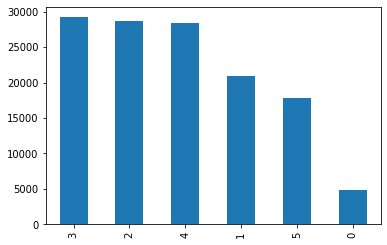

In [ ]:
air['Seat comfort'].value_counts().plot(kind='bar')
plt.show()

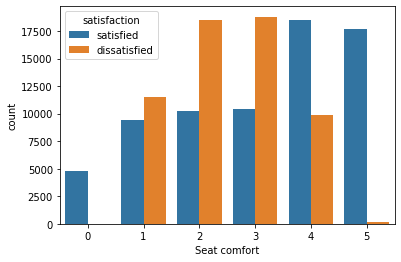

In [ ]:
sns.countplot(air['Seat comfort'],hue=air['satisfaction'])
plt.show()

The most common rating for seat comfort is 3. Ratings 3,2,1 have almost similar counts. There are about 5000 0 rating in the dataset, there is a clear separation of the satisfied and dissatisfied customers in the ratings for Seat Comfort.

#### Departure/Arrival time convenient

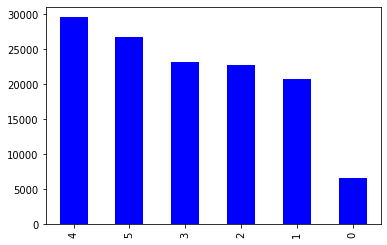

In [ ]:
air['Departure/Arrival time convenient'].value_counts().plot(kind='bar',color='blue')
plt.show()

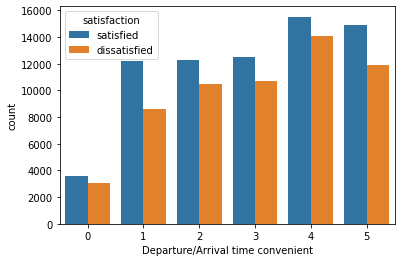

In [ ]:
sns.countplot(air['Departure/Arrival time convenient'],hue = air['satisfaction'])
plt.show()

The most common rating is 4, the number of rating is almost similarly distributed except 0. The number of customers who are satisifed and dissatisfied for each rating is almost similar

#### Gender

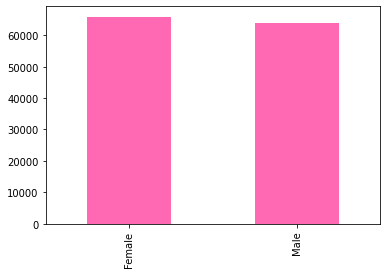

In [ ]:
air.Gender.value_counts().plot(kind='bar',color='hotpink')
plt.show()

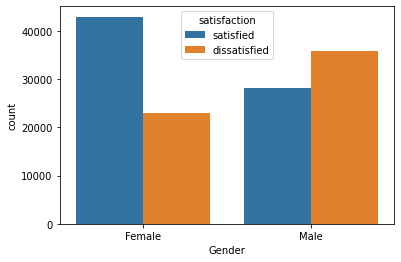

In [ ]:
sns.countplot(air['Gender'],hue = air['satisfaction'])
plt.show()

There are almost equal number of male and female in the dataset,female customers are more satisfied with the airline

#### Satisfaction (Target)

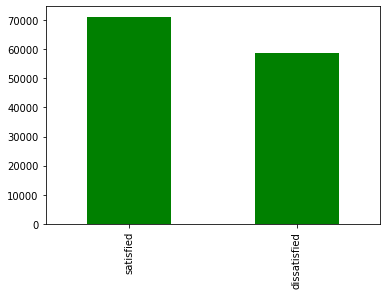

In [ ]:
air['satisfaction'].value_counts().plot(kind='bar',color='g')
plt.show()

There are almost similar nunber of satisfied and dissatisfied customers in the dataset.

#### Customer Type

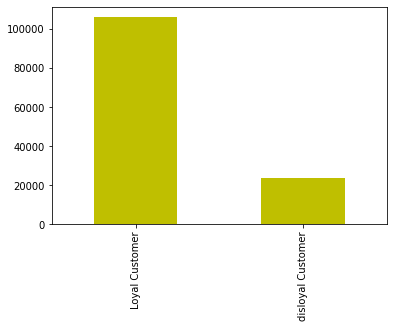

In [ ]:
air['Customer Type'].value_counts().plot(kind='bar',color='y')
plt.show()

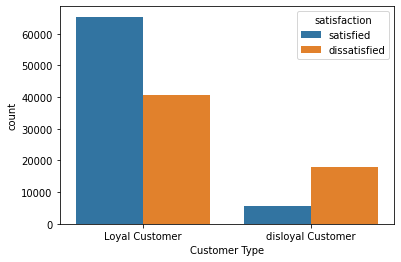

In [ ]:
sns.countplot(air['Customer Type'],hue = air['satisfaction'])
plt.show()

There are more number of loyal customers in the dataset in comparision to disloyal customers which maybe the representation of the population. Loyal mostly for the loyal customers are satisfied with the airline and most of the disloyal customers are not satisfied with the airline

#### Food and drink

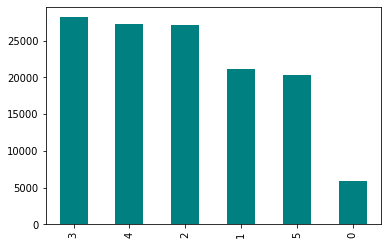

In [ ]:
air['Food and drink'].value_counts().plot(kind='bar',color='teal')
plt.show()

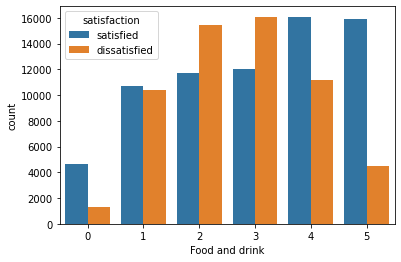

In [ ]:
sns.countplot(air['Food and drink'],hue = air['satisfaction'])
plt.show()

The most common rating for food and drink is 3, about 5000 of the passengers gave 0 rating for the food. There is clear seperation of the satisified and dissatisfied customers based on the ratings.

#### Gate Location

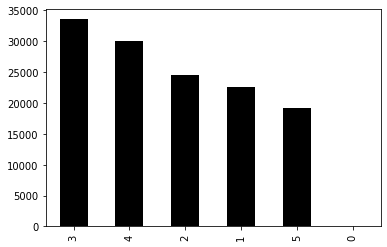

In [ ]:
air['Gate location'].value_counts().plot(kind='bar',color='black')
plt.show()

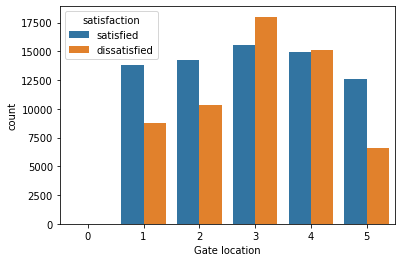

In [ ]:
sns.countplot(air['Gate location'],hue = air['satisfaction'])
plt.show()

The most common rating for Gate location is 3. Very minimal customers gave the rating of 0, there is a clear serparation of the satisfied and dissatisfied customers based on the the ratings

#### Inflight wifi service

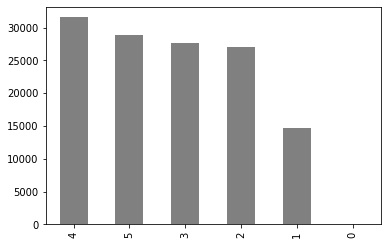

In [ ]:
air['Inflight wifi service'].value_counts().plot(kind='bar',color='grey')
plt.show()

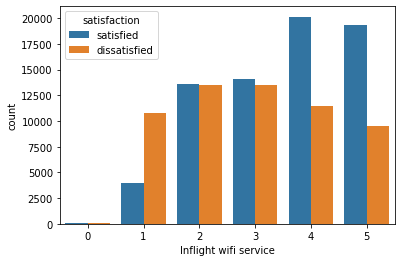

In [ ]:
sns.countplot(air['Inflight wifi service'],hue = air['satisfaction'])
plt.show()

The most common rating for Inflight wifi service is 4. Very minimal customers gave a rating of 0. Almost equal number of satisfied customers gave the rating of 2,3 and 0. There is clear seraration of number of satisfied and dissatisfied customers for the other ratings

#### Inflight entertainment

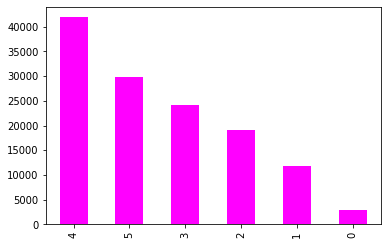

In [ ]:
air['Inflight entertainment'].value_counts().plot(kind='bar',color='magenta')
plt.show()

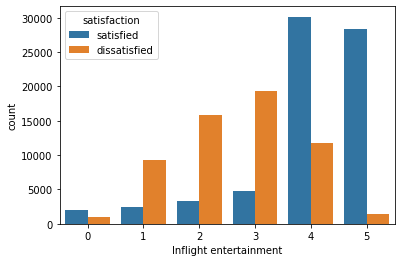

In [ ]:
sns.countplot(air['Inflight entertainment'],hue = air['satisfaction'])
plt.show()

The most common rating for inflight entertainment is 4. The minimum rating is 0 with about 3000 ratings. There is clear distinction of ratings provided by satisfied and dissatisfied customers for Inflight entertainment

#### Online support

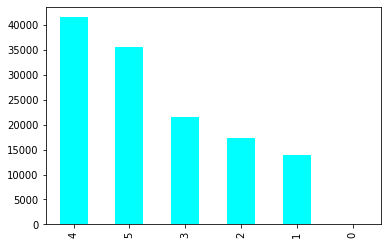

In [ ]:
air['Online support'].value_counts().plot(kind='bar',color='cyan')
plt.show()

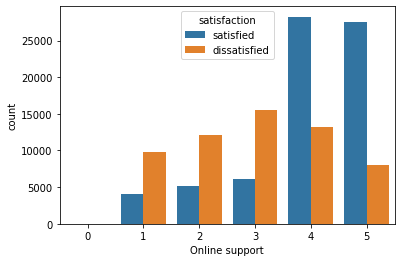

In [ ]:
sns.countplot(air['Online support'],hue = air['satisfaction'])
plt.show()

The online support has been rated 4 by most of the customers. Very negligible customers rated it 0. There is clear distinction in the ratings provided by satisfied and dissatisfied customers 

#### Ease of Online booking

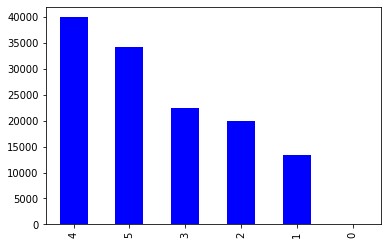

In [ ]:
air['Ease of Online booking'].value_counts().plot(kind='bar',color='blue')
plt.show()

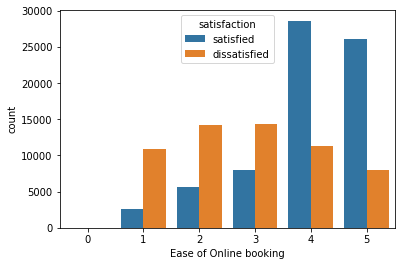

In [ ]:
sns.countplot(air['Ease of Online booking'],hue = air['satisfaction'])
plt.show()

The most common rating for ease of online booking is 4 and very negligible people gave it the rating of 0. There is clear distinction of satisfied and dissatisfied customers for all the ratings

#### On-board service

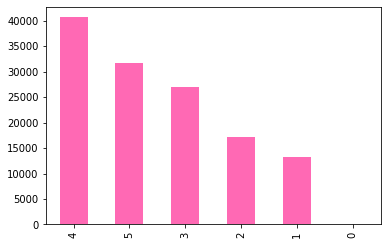

In [ ]:
air['On-board service'].value_counts().plot(kind='bar',color='hotpink')
plt.show()

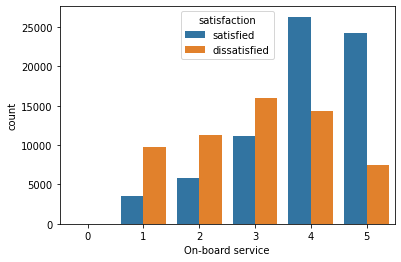

In [ ]:
sns.countplot(air['On-board service'],hue = air['satisfaction'])
plt.show()

4 is the most common rating for on-board service and 0 is the least common score given. The number of satisfied and dissatisfied customers is different for all the ratings

#### Leg room service

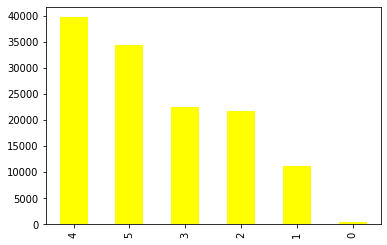

In [ ]:
air['Leg room service'].value_counts().plot(kind='bar',color='yellow')
plt.show()

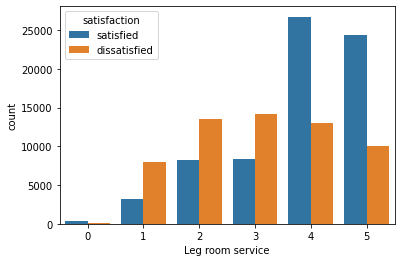

In [ ]:
sns.countplot(air['Leg room service'],hue = air['satisfaction'])
plt.show()

The most common rating for Leg room service is 4, the least common rating is 0. There is a clear differnce in the ratings provided by the satisfied and dissatisfied customers

#### Baggage handling

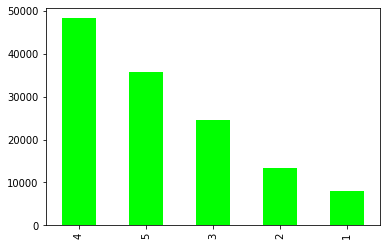

In [ ]:
air['Baggage handling'].value_counts().plot(kind='bar',color='lime')
plt.show()

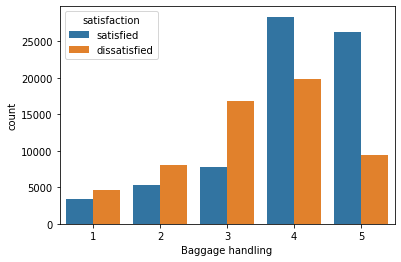

In [ ]:
sns.countplot(air['Baggage handling'],hue = air['satisfaction'])
plt.show()

The most comming rating for baggage handling is 4 the, 1 is the least common rating. There are no 0 rating. There is not much diffence in the number of customers who rated baggage handling as 1 for satisfied and unsatisfied customers

#### Checkin service

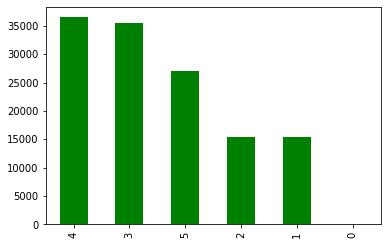

In [ ]:
air['Checkin service'].value_counts().plot(kind='bar',color='green')
plt.show()

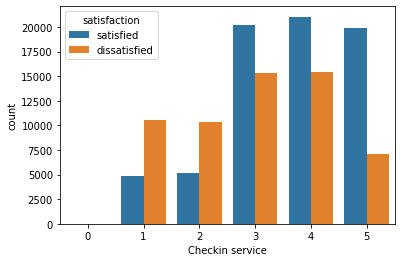

In [ ]:
sns.countplot(air['Checkin service'],hue = air['satisfaction'])
plt.show()

The most common rating for checkin service is 4, very minimal customers gave rating 0. There is clear difference in the number of customers who are satified and dissatisfied for each of the ratings

#### Cleanliness

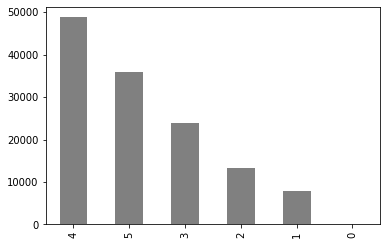

In [ ]:
air['Cleanliness'].value_counts().plot(kind='bar',color='grey')
plt.show()

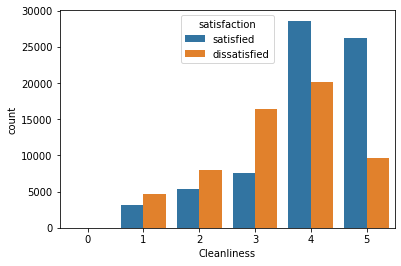

In [ ]:
sns.countplot(air['Cleanliness'],hue = air['satisfaction'])
plt.show()

Almost half of the customers gave cleanliness the rating of 4, very few customers gave it a 0 rating. There is not much diffence in the number of satisfied and dissatisfied customers for ratings 1 and 2

#### Online boarding

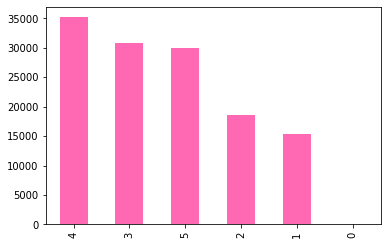

In [ ]:
air['Online boarding'].value_counts().plot(kind='bar',color='hotpink')
plt.show()

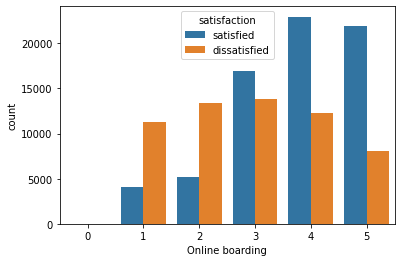

In [ ]:
sns.countplot(air['Online boarding'],hue = air['satisfaction'])
plt.show()

Very few customers rated online boarding 0, 4 is the most common rating. There is clear separation of number of satisfied and dissatisfied customers in each of the ratings.

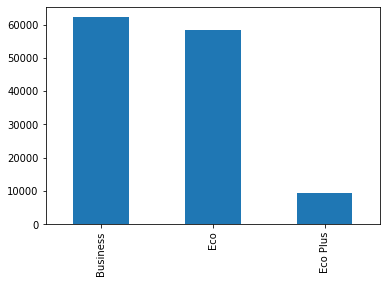

In [ ]:
air['Class'].value_counts().plot(kind='bar')
plt.show()

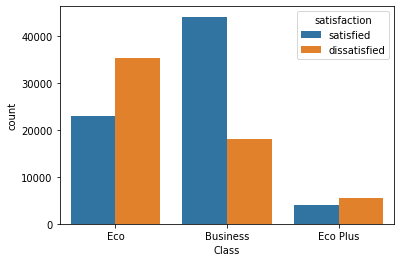

In [ ]:
sns.countplot(air['Class'],hue = air['satisfaction'])
plt.show()

Most of the customers travelled by business class, which is followed closely by eco and the least number of customers travelled by Eco Plus. The passengers in Business class are mostly satisfied with the airline and passengers in economy class are mostly dissatisied with the airline

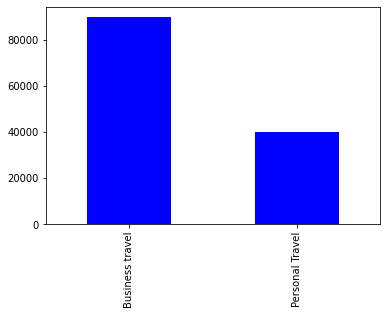

In [ ]:
air['Type of Travel'].value_counts().plot(kind='bar',color='blue')
plt.show()

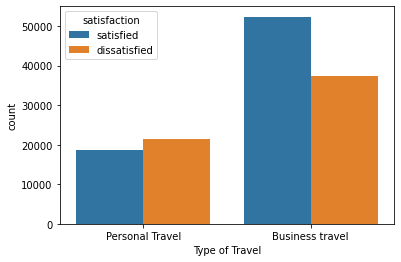

In [ ]:
sns.countplot(air['Type of Travel'],hue = air['satisfaction'])
plt.show()

About 60% of the customers use the airline for business travel, 40% use it for personal travel. Majority of the business travellers are satisfied with the airline. Almost equal number of personal travellers are satisfied and dissatisfied with the airline

### Analysis of Numerical Variables

#### Departure Delay in Minutes

In [ ]:
air['Departure Delay in Minutes'].describe()

count    129880.000000
mean         14.713713
std          38.071126
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

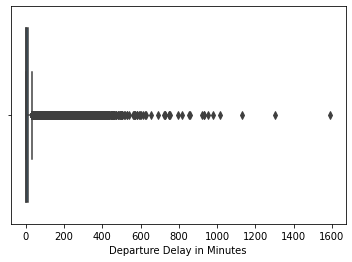

In [ ]:
sns.boxplot(air['Departure Delay in Minutes'].dropna())
plt.show()

In [ ]:
pd.pivot_table(air,index='satisfaction',values='Departure Delay in Minutes',aggfunc='mean')

,Departure Delay in Minutes
satisfaction,
dissatisfied,17.807749
satisfied,12.154768


There are too many outier in the departure delay in minutes column, the outliers cannnot be removed as it may be a cause for the rating. The variable is right skewed. On average passengers are dissatisfied if the departure delay is on average 17.8 minutes.

#### Arrival Delay in Minutes

In [ ]:
air['Arrival Delay in Minutes'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

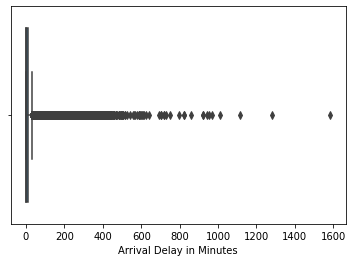

In [ ]:
sns.boxplot(air['Arrival Delay in Minutes'].dropna())

In [ ]:
pd.pivot_table(air,index='satisfaction',values='Arrival Delay in Minutes',aggfunc='mean')

,Arrival Delay in Minutes
satisfaction,
dissatisfied,18.504599
satisfied,12.268883


There are many outliers in the Arrival Delay in Minutes column, the outliers cannot be removed as it may be a cause of the bad rating, it is right skewed. On average passengers are dissatisfied if there is a delay more than 18.5 minutes

#### Age

In [ ]:
air['Age'].describe()

count    129880.000000
mean         39.427957
std          15.119360
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

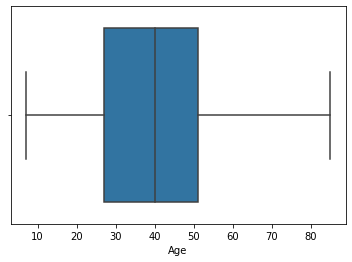

In [ ]:
sns.boxplot(air['Age'])

In [ ]:
pd.pivot_table(air,index='satisfaction',values='Age',aggfunc='mean')

,Age
satisfaction,
dissatisfied,37.466671
satisfied,41.050051


There are not outliers in the variable age, it is right skewed. The average age of the satisfied customers in more than the dissatisfied customers.

## Flight Distance

In [ ]:
air['Flight Distance'].describe()

count    129880.000000
mean       1981.409055
std        1027.115606
min          50.000000
25%        1359.000000
50%        1925.000000
75%        2544.000000
max        6951.000000
Name: Flight Distance, dtype: float64

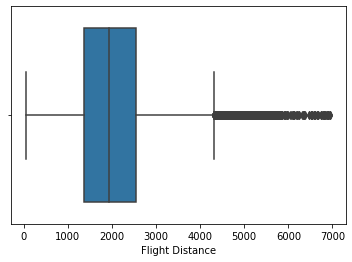

In [ ]:
sns.boxplot(air['Flight Distance'])

In [ ]:
pd.pivot_table(air,index='satisfaction',values='Flight Distance',aggfunc='mean')

,Flight Distance
satisfaction,
dissatisfied,2025.709234
satisfied,1944.770281


There are a few outliers in the flight distance. The passengers who are travelling more distance tend to be more dissatisfied with the airline



### Summary of Findings in EDA
1. There is almost similar number of satisfied and dissatisfied customers there is no imbalance in the dataset.
2. Female customers are more satisfied with the airline in comparision of the male customers.
3. Loyal Customers are in general satisfied with the airline and disloyal customers are mostly dissatisfied with the airline
4. Most of the passengers in the airline travel by business class, most of the business class passengers are satisfied with the airline
5. The airline is mostly used for business travel, more number of business travellers are satisified than dissatisfied with the airline
6. There are long delays in both arrival and departure of the airline. There is only a few minutes differnce in the mean delay for arrival and departure
7. The mean age of the dissatisfied passengers is less than the satisfied customers

##  Encoding of Catagorical Variables

####  Class (ordinal)

In [5]:
air['Class'] = air['Class'].replace({'Eco':1,'Eco Plus':2,'Business':3})

#### Gender, Customer Type, Type of Travel (nominal)

In [6]:
air[['Male','disloyal Customer','Personal Travel']] = pd.get_dummies(air[['Gender','Customer Type','Type of Travel']],drop_first=True)
air.drop(['Gender','Customer Type','Type of Travel'],axis=1,inplace=True)
air.head()

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Male,disloyal Customer,Personal Travel
0,satisfied,65,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,0,0,1
1,satisfied,47,3,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,1,0,1
2,satisfied,15,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,0,0,1
3,satisfied,60,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,0,0,1
4,satisfied,70,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,0,0,1


#### Encoding Target Column (satisfaction)

In [7]:
air['satisfaction']=air['satisfaction'].replace({'satisfied':0,'dissatisfied':1})

In [8]:
air.rename(columns={'satisfaction':'dissatisfied'},inplace=True)

To make the analysis less confusing satisfied is coded as 0 and dissatisfied as coded as 1 as it is what we are looking for the column satisfaction is renamed as dissatisfied.

#### Checking info of data

In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   dissatisfied                       129880 non-null  int64  
 1   Age                                129880 non-null  int64  
 2   Class                              129880 non-null  int64  
 3   Flight Distance                    129880 non-null  int64  
 4   Seat comfort                       129880 non-null  int64  
 5   Departure/Arrival time convenient  129880 non-null  int64  
 6   Food and drink                     129880 non-null  int64  
 7   Gate location                      129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Inflight entertainment             129880 non-null  int64  
 10  Online support                     129880 non-null  int64  
 11  Ease of Online booking             1298

All the columns are in the required numeric data type

### Null Values

In [ ]:
air.isnull().sum()

dissatisfied                           0
Age                                    0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
Male                                   0
disloyal Customer                      0
Personal Travel                        0
dtype: int64

There are null values are in the arrival delay in minutes column

## Null Value handling

Imputing null values using KNN Imputer

In [9]:
knn = KNNImputer()
air_fill = pd.DataFrame(knn.fit_transform(air),columns=air.columns)
air_fill.head()

,dissatisfied,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Male,disloyal Customer,Personal Travel
0,0.0,65.0,1.0,265.0,0.0,0.0,0.0,2.0,2.0,4.0,2.0,3.0,3.0,0.0,3.0,5.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0
1,0.0,47.0,3.0,2464.0,0.0,0.0,0.0,3.0,0.0,2.0,2.0,3.0,4.0,4.0,4.0,2.0,3.0,2.0,310.0,305.0,1.0,0.0,1.0
2,0.0,15.0,1.0,2138.0,0.0,0.0,0.0,3.0,2.0,0.0,2.0,2.0,3.0,3.0,4.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0
3,0.0,60.0,1.0,623.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,1.0,1.0,0.0,1.0,4.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
4,0.0,70.0,1.0,354.0,0.0,0.0,0.0,3.0,4.0,3.0,4.0,2.0,2.0,0.0,2.0,4.0,2.0,5.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
air_fill.isnull().sum()

dissatisfied                         0
Age                                  0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Male                                 0
disloyal Customer                    0
Personal Travel                      0
dtype: int64

The null values have been imputed using KNN imputer

# Feature Engineering

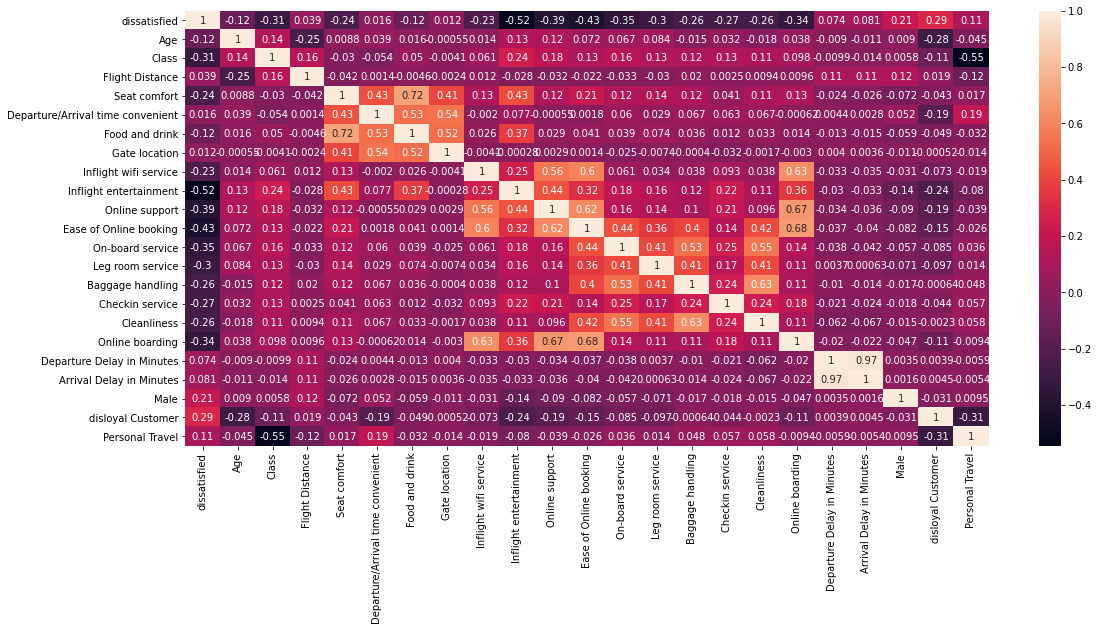

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(air_fill.corr(),annot=True)
plt.show()

In [ ]:
print(air_fill[['Departure Delay in Minutes','Arrival Delay in Minutes']][air_fill['Departure Delay in Minutes']!=0])

        Departure Delay in Minutes  Arrival Delay in Minutes
1                            310.0                     305.0
6                             17.0                      15.0
9                             30.0                      26.0
10                            47.0                      48.0
14                            40.0                      48.0
...                            ...                       ...
129874                         5.0                       0.0
129876                       174.0                     172.0
129877                       155.0                     163.0
129878                       193.0                     205.0
129879                       185.0                     186.0

[56524 rows x 2 columns]


As seen the delay in departure cause delay in the arrival. In some cases there is more delay in arrival in comparision to delay in departure. Therefore average delay can be engineered as a new feature.

In [10]:
air_fill['Average Delay in Minutes'] = (air_fill['Departure Delay in Minutes']+air_fill['Arrival Delay in Minutes'])/2

In [11]:
air_fill.drop(['Arrival Delay in Minutes','Departure Delay in Minutes'],axis=1,inplace=True)

In [ ]:
air_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   dissatisfied                       129880 non-null  float64
 1   Age                                129880 non-null  float64
 2   Class                              129880 non-null  float64
 3   Flight Distance                    129880 non-null  float64
 4   Seat comfort                       129880 non-null  float64
 5   Departure/Arrival time convenient  129880 non-null  float64
 6   Food and drink                     129880 non-null  float64
 7   Gate location                      129880 non-null  float64
 8   Inflight wifi service              129880 non-null  float64
 9   Inflight entertainment             129880 non-null  float64
 10  Online support                     129880 non-null  float64
 11  Ease of Online booking             1298

## Statistical Tests on Data

In [ ]:
from scipy import stats

### Age

In [ ]:
X1 = air_fill[air_fill['dissatisfied']==0]['Age']
X2 = air_fill[air_fill['dissatisfied']==1]['Age']

In [ ]:
stats.shapiro(X1)

(0.9856559038162231, 0.0)

In [ ]:
stats.shapiro(X2)

(0.980595588684082, 0.0)

pvalue is less than 0.05 therefore the data is not normal

In [ ]:
stats.mannwhitneyu(X1,X2)

MannwhitneyuResult(statistic=1773473469.5, pvalue=0.0)

pvalue is less than 0.05 which shows that he age of the customers who are satisfied and dissatisfied are significantly different

Age is an important feature to predict customer satisfaction

### Flight Distance

In [ ]:
X1 = air_fill[air_fill['dissatisfied']==0]['Flight Distance']
X2 = air_fill[air_fill['dissatisfied']==1]['Flight Distance']

In [ ]:
stats.shapiro(X1)

(0.9746437072753906, 0.0)

In [ ]:
stats.shapiro(X2)

(0.9702990055084229, 0.0)

pvalue is less than 0.05 the data is not normally distributed

In [ ]:
stats.mannwhitneyu(X1,X2)

MannwhitneyuResult(statistic=1974094133.5, pvalue=1.5801188605778232e-66)

p-values is less than 0.05, which signifies that average flight distance is different for satisfied and dissatisfied customers

Flight Distance is an important feature to predict customer satisfaction

### Average Arrival/Departure Delay in minutes

In [ ]:
X1 = air_fill[air_fill['dissatisfied']==0]['Average Delay in Minutes']
X2 = air_fill[air_fill['dissatisfied']==1]['Average Delay in Minutes']

In [ ]:
stats.shapiro(X1)

(0.40348631143569946, 0.0)

In [ ]:
stats.shapiro(X2)

(0.4504685401916504, 0.0)

pvalue is less than 0.05 therefore the data is not normally distributed

In [ ]:
stats.mannwhitneyu(X1,X2)

MannwhitneyuResult(statistic=1879117590.0, pvalue=4.5064639815019435e-238)

p-values is less than 0.05 therefore the mean arrival delay in minutes the Average Departure/Arrival Delay in minutes is significantly different for the satisfied and dissatisfied customers.

### Catagorical Features

### Class

In [ ]:
ct = pd.crosstab(air_fill['Class'],air_fill['dissatisfied'])
stats.chi2_contingency(ct)

(12671.683816044484, 0.0, 2, array([[31914.16602248, 26394.83397752],
        [ 5150.90665999,  4260.09334001],
        [34021.92731752, 28138.07268248]]))

pvalue is less than 0.05 therefore class is a significant feature in predicting satisfcation of customer

### Seatcomfort

In [ ]:
ct = pd.crosstab(air_fill['Seat comfort'],air_fill['dissatisfied'])
stats.chi2_contingency(ct)

(28685.135019474306, 0.0, 5, array([[ 2625.53386973,  2171.46613027],
        [11465.98062057,  9483.01937943],
        [15722.55283338, 13003.44716662],
        [15972.68186788, 13210.31813212],
        [15543.02914998, 12854.97085002],
        [ 9757.22165845,  8069.77834155]]))

pvalue is less than 0.05 therefore seat comfort is a significant factor in prediting customer satisfcation

### Departure/Arrival time convenient

In [ ]:
ct = pd.crosstab(air_fill['Departure/Arrival time convenient'],air_fill['dissatisfied'])
stats.chi2_contingency(ct)

p value is less than 0.05 therefore Departure/Arrival time convenient is important feature for predicting customer satisfaction

### Food and Drink

In [ ]:
ct = pd.crosstab(air_fill['Food and drink'],air_fill['dissatisfied'])
stats.chi2_contingency(ct)

(9124.158213112665, 0.0, 5, array([[ 3253.86676163,  2691.13323837],
        [11535.49131506,  9540.50868494],
        [14857.77411457, 12288.22588543],
        [15407.29173083, 12742.70826917],
        [14896.08709578, 12319.91290422],
        [11136.48898214,  9210.51101786]]))

pvalue is less than 0.05 therefore food and drink is an important feature in predicting customer satisfaction

### Gate Location

In [ ]:
ct = pd.crosstab(air_fill['Gate location'],air_fill['dissatisfied'])
stats.chi2_contingency(ct)

(2642.495014493794, 0.0, 5, array([[1.09465661e+00, 9.05343394e-01],
        [1.23504632e+04, 1.02145368e+04],
        [1.34193953e+04, 1.10986047e+04],
        [1.83606753e+04, 1.51853247e+04],
        [1.64680140e+04, 1.36199860e+04],
        [1.04873576e+04, 8.67364239e+03]]))

pvalue is less than 0.05 therefore gate location is an important feature in predicting customer satisfaction

### Inflight Wifi Service

In [ ]:
ct = pd.crosstab(air_fill['Inflight wifi service'],air_fill['dissatisfied'])
stats.chi2_contingency(ct)

(7782.2942500368235, 0.0, 5, array([[   72.247336  ,    59.752664  ],
        [ 8051.74666615,  6659.25333385],
        [14802.49395596, 12242.50604404],
        [15107.35582076, 12494.64417924],
        [17273.68124423, 14286.31875577],
        [15779.4749769 , 13050.5250231 ]]))

pvalue is less than 0.05 therefore inflight wifi service is an important feature in predicting customer satisfaction

### Inflight Entertainment

In [ ]:
ct = pd.crosstab(air_fill['Inflight entertainment'],air_fill['dissatisfied'])
stats.chi2_contingency(ct)

(53171.3649262775, 0.0, 5, array([[ 1629.94368648,  1348.05631352],
        [ 6463.39993071,  5345.60006929],
        [10499.39883739,  8683.60116261],
        [13245.34493379, 10954.65506621],
        [22921.56200339, 18957.43799661],
        [16327.35060825, 13503.64939175]]))

pvalue is less than 0.05 there is an effect of inflight entertainment on customer satisfaction 

### Online Support

In [ ]:
ct = pd.crosstab(air_fill['Online support'],air_fill['dissatisfied'])
stats.chi2_contingency(ct)

(24359.061215020127, 0.0, 5, array([[5.47328303e-01, 4.52671697e-01],
        [7.62811456e+03, 6.30888544e+03],
        [9.44688651e+03, 7.81311349e+03],
        [1.18272173e+04, 9.78178270e+03],
        [2.27195979e+04, 1.87904021e+04],
        [1.94646364e+04, 1.60983636e+04]]))

pvalue is less than 0.05 there is an effect of Online support on customer satisfaction 

### Ease of Online booking

In [ ]:
ct = pd.crosstab(air_fill['Ease of Online booking'],air_fill['dissatisfied'])
stats.chi2_contingency(ct)

(26797.45365576586, 0.0, 5, array([[9.85190945e+00, 8.14809055e+00],
        [7.35390308e+03, 6.08209692e+03],
        [1.09197470e+04, 9.03125303e+03],
        [1.22700059e+04, 1.01479941e+04],
        [2.18493459e+04, 1.80706541e+04],
        [1.86841463e+04, 1.54528537e+04]]))

pvalue is less than 0.05 there is an effect of Ease of Online booking on customer satisfaction 

### On-board service

In [ ]:
ct = pd.crosstab(air_fill['On-board service'],air_fill['dissatisfied'])
stats.chi2_contingency(ct)

(16975.447013662524, 0.0, 5, array([[2.73664152e+00, 2.26335848e+00],
        [7.26030994e+03, 6.00469006e+03],
        [9.39981628e+03, 7.77418372e+03],
        [1.47981153e+04, 1.22388847e+04],
        [2.22625787e+04, 1.84124213e+04],
        [1.73634431e+04, 1.43605569e+04]]))

pvalue is less than 0.05 there is an effect of On-board service on customer satisfaction 

### Legroom Service

In [ ]:
ct = pd.crosstab(air_fill['Leg room service'],air_fill['dissatisfied'])
stats.chi2_contingency(ct)

(14654.190379649002, 0.0, 5, array([[  243.01376655,   200.98623345],
        [ 6097.78462427,  5043.21537573],
        [11901.6539498 ,  9843.3460502 ],
        [12296.8249846 , 10170.1750154 ],
        [21727.83897444, 17970.16102556],
        [18819.88370034, 15565.11629966]]))

pvalue is less than 0.05 there is an effect of Leg room service on customer satisfaction 

### Baggage Handling

In [ ]:
ct = pd.crosstab(air_fill['Baggage handling'],air_fill['dissatisfied'])
stats.chi2_contingency(ct)

(12508.660858267373, 0.0, 4, array([[ 4364.94321682,  3610.05678318],
        [ 7351.71376655,  6080.28623345],
        [13401.33350015, 11083.66649985],
        [26403.11733908, 21836.88266092],
        [19565.89217739, 16182.10782261]]))

pvalue is less than 0.05 there is an effect of Baggage handling on customer satisfaction 

### Checkin Service

In [ ]:
ct = pd.crosstab(air_fill['Checkin service'],air_fill['dissatisfied'])
stats.chi2_contingency(ct)

(10257.399177859646, 0.0, 5, array([[5.47328303e-01, 4.52671697e-01],
        [8.41188869e+03, 6.95711131e+03],
        [8.47592610e+03, 7.01007390e+03],
        [1.94509532e+04, 1.60870468e+04],
        [1.99670838e+04, 1.65139162e+04],
        [1.47806008e+04, 1.22243992e+04]]))

pvalue is less than 0.05 there is an effect of Checkin service on customer satisfaction 

### Cleanliness

In [ ]:
ct = pd.crosstab(air_fill['Cleanliness'],air_fill['dissatisfied'])
stats.chi2_contingency(ct)

(12072.945339295646, 0.0, 5, array([[2.73664152e+00, 2.26335848e+00],
        [4.25164626e+03, 3.51635374e+03],
        [7.34076720e+03, 6.07123280e+03],
        [1.31271220e+04, 1.08568780e+04],
        [2.67068845e+04, 2.20881155e+04],
        [1.96578433e+04, 1.62581567e+04]]))

pvalue is less than 0.05 there is an effect of Cleanliness on customer satisfaction 

### Online boarding

In [ ]:
ct = pd.crosstab(air_fill['Online boarding'],air_fill['dissatisfied'])
stats.chi2_contingency(ct)

(15954.160194331536, 0.0, 5, array([[7.66259624e+00, 6.33740376e+00],
        [8.40641541e+03, 6.95258459e+03],
        [1.01655286e+04, 8.40747143e+03],
        [1.68467652e+04, 1.39332348e+04],
        [1.92555570e+04, 1.59254430e+04],
        [1.64050712e+04, 1.35679288e+04]]))

pvalue is less than 0.05 there is an effect of Online boarding on customer satisfaction 

### Male

In [ ]:
# Gender_Male
ct = pd.crosstab(air_fill['Male'],air_fill['dissatisfied'])
stats.chi2_contingency(ct)

(5849.476393129708, 0.0, 1, array([[36068.38784262, 29830.61215738],
        [35018.61215738, 28962.38784262]]))

pvalue is less than 0.05 there is an effect of Gender on customer satisfaction 

### Disloyal Customer

In [ ]:
ct = pd.crosstab(air_fill['disloyal Customer'],air_fill['dissatisfied'])
stats.chi2_contingency(ct)

(11117.536034981524, 0.0, 1, array([[58071.5329535, 48028.4670465],
        [13015.4670465, 10764.5329535]]))

pvalue is less than 0.05 there is an effect of Customer Type on customer satisfaction 

### Personal Travel

In [ ]:
ct = pd.crosstab(air_fill['Personal Travel'],air_fill['dissatisfied'])
stats.chi2_contingency(ct)

(1549.3963976645564, 0.0, 1, array([[49091.51748537, 40601.48251463],
        [21995.48251463, 18191.51748537]]))

pvalue is less than 0.05 there is an effect of Type of Travel on customer satisfaction 

# Splitting Data into Train and Test set

In [ ]:
X = air_fill.drop('dissatisfied',axis=1)
y = air_fill.dissatisfied

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)

## Logistic Regression

### Assumptions of Logistic Regression
1. There is linear relationship between features and log odds
2. There are no outliers in the data
3. There is no multicolinearity in the dataset

#### 1. Linear Relationship

Log odds plot of Age


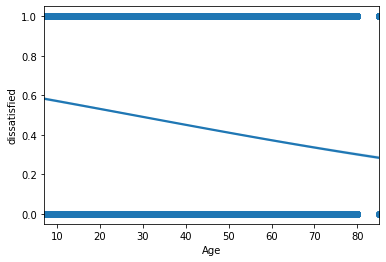

Log odds plot of Class


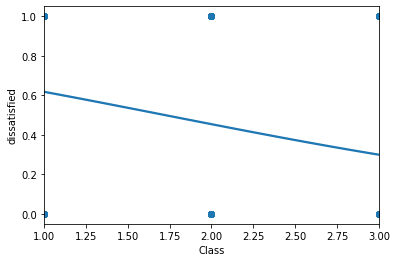

Log odds plot of Flight Distance


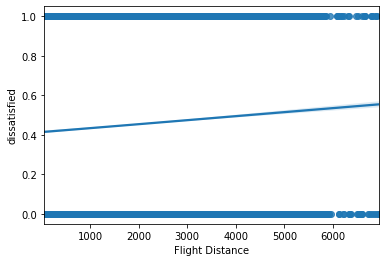

Log odds plot of Seat comfort


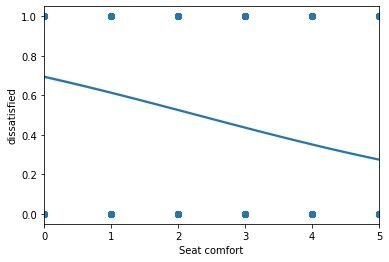

Log odds plot of Departure/Arrival time convenient


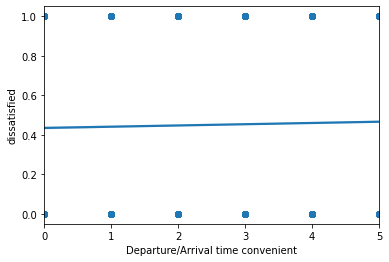

Log odds plot of Food and drink


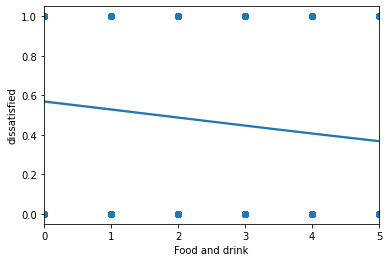

Log odds plot of Gate location


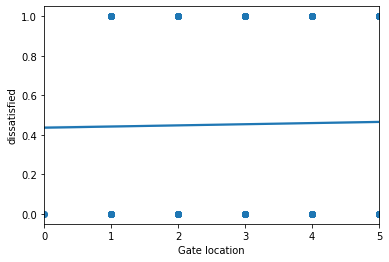

Log odds plot of Inflight wifi service


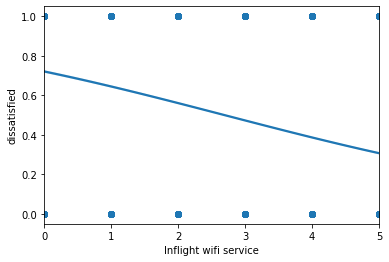

Log odds plot of Inflight entertainment


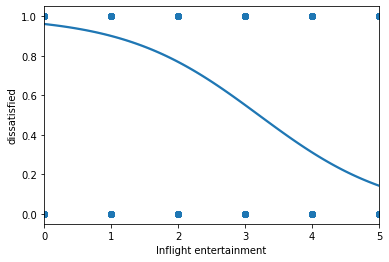

Log odds plot of Online support


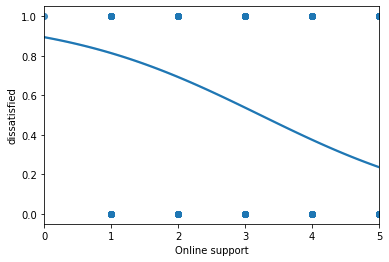

Log odds plot of Ease of Online booking


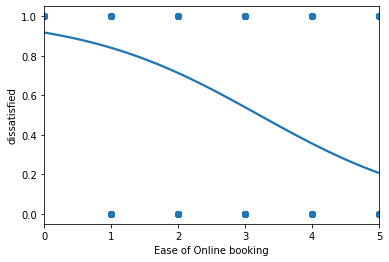

Log odds plot of On-board service


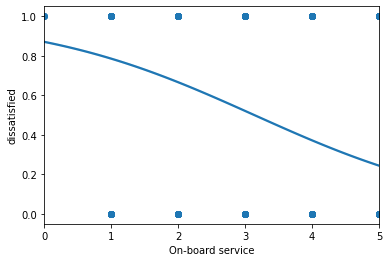

Log odds plot of Leg room service


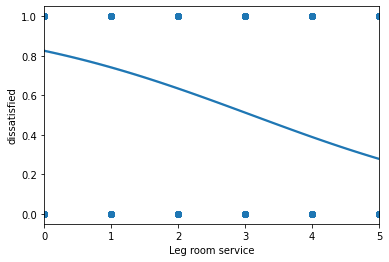

Log odds plot of Baggage handling


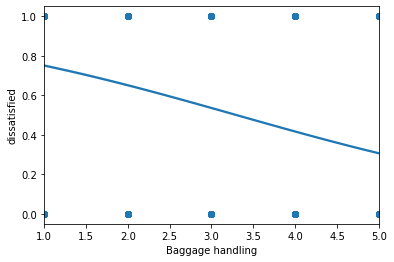

Log odds plot of Checkin service


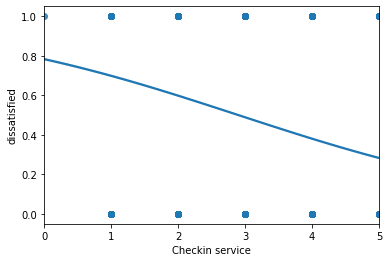

Log odds plot of Cleanliness


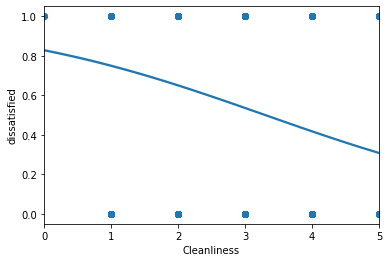

Log odds plot of Online boarding


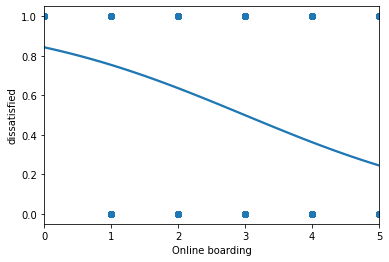

Log odds plot of Male


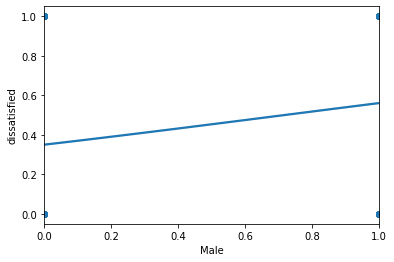

Log odds plot of disloyal Customer


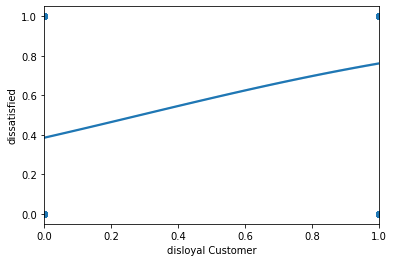

Log odds plot of Personal Travel


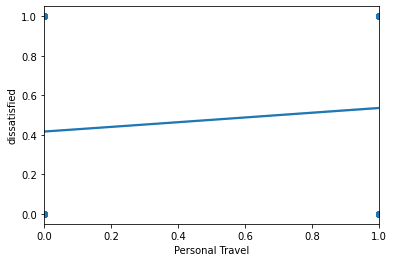

Log odds plot of Average Delay in Minutes


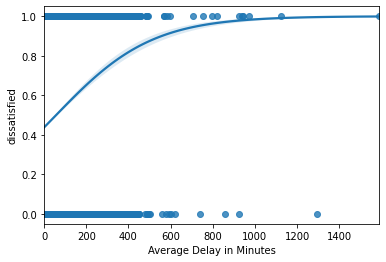

In [ ]:
for i in X_train.columns:
  print('Log odds plot of',i)
  sns.regplot(x=X_train[i],y=y_train,logistic=True)
  plt.show()


There is linear relationship between the features.

####  2. Outliers

In [ ]:
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)
pt = PowerTransformer()
X_train = pd.DataFrame(pt.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(pt.transform(X_test),columns=X_test.columns)

Outliers are handled by scaling and transforming the data

### Multicolinearity

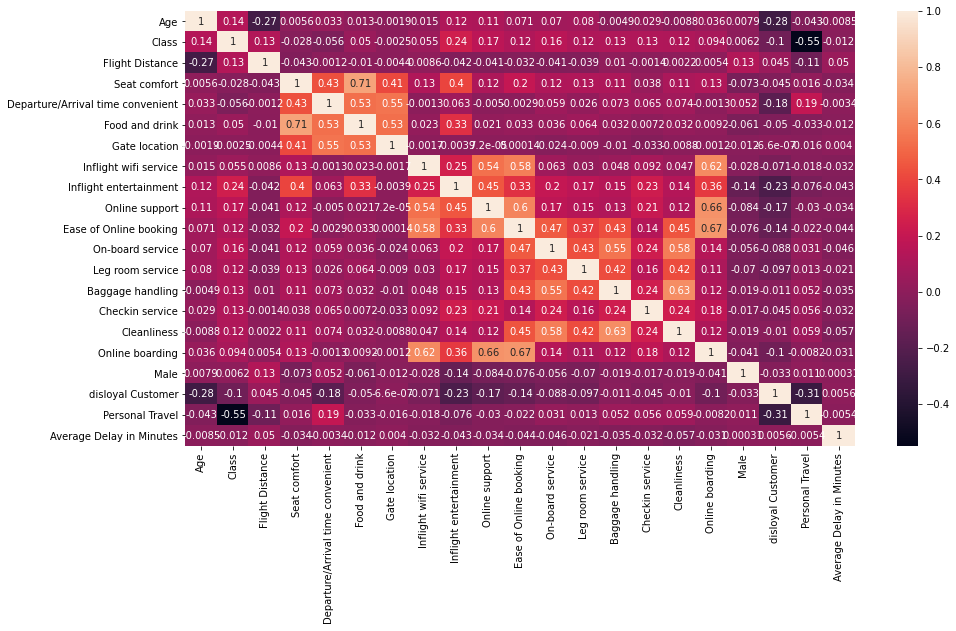

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

As shown in the heatmap there is multicolinearity in the data it can be removed using variance inflation factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['Features']=X.columns
vif.sort_values('VIF',ascending=False).reset_index(drop=True)

,VIF,Features
0,3.823836,Ease of Online booking
1,2.691278,Food and drink
2,2.603017,Online boarding
3,2.389386,Seat comfort
4,2.259579,Online support
5,2.114829,Cleanliness
6,1.983669,Inflight wifi service
7,1.975774,Baggage handling
8,1.964169,Personal Travel
9,1.886903,On-board service


In [ ]:
# dropping ease of online booking
X_train.drop('Ease of Online booking',inplace=True,axis=1)

In [ ]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['Features']=X_train.columns
vif.sort_values('VIF',ascending=False).reset_index(drop=True)

,VIF,Features
0,2.685817,Food and drink
1,2.351040,Seat comfort
2,2.186219,Online boarding
3,2.123710,Online support
4,1.985132,Cleanliness
5,1.938254,Personal Travel
6,1.912334,Baggage handling
7,1.860942,Departure/Arrival time convenient
8,1.856050,Inflight entertainment
9,1.833094,Class


### Base Model

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.8469869623241967 

Train accuracy:  0.8448677900479563 

Precision:  0.8239373601789709 

Recall:  0.8396215661689274 

F1 Score:  0.8317055270140575 

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     21418
         1.0       0.82      0.84      0.83     17546

    accuracy                           0.85     38964
   macro avg       0.85      0.85      0.85     38964
weighted avg       0.85      0.85      0.85     38964
 



### Model Tuning Using Grid Search CV

In [ ]:
lr = LogisticRegression()
params = {'C': [0.01, 0.1, 1],'penalty':['l1','l2','none'],'solver':['lbfgs','newton-cg','liblinear'] }
grid = GridSearchCV(estimator=lr,param_grid=params,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
lr = LogisticRegression(C=0.01,penalty='l1',solver='liblinear')
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.8474745919310133 

Train accuracy:  0.8451867658057988 

Precision:  0.8238347753279375 

Recall:  0.8411603784338311 

F1 Score:  0.8324074335185133 

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     21418
         1.0       0.82      0.84      0.83     17546

    accuracy                           0.85     38964
   macro avg       0.85      0.85      0.85     38964
weighted avg       0.85      0.85      0.85     38964
 



### Confusion Matrix

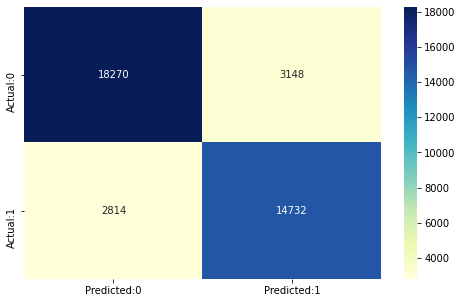

In [ ]:
cm=confusion_matrix(y_test,y_test_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

### Model Statistics

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print(' The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

 The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.8416487013653629 

 The Miss-classification = 1-Accuracy =  0.15835129863463715 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.8281659637524222 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.8526939957045476 

 Positive Predictive value = TP / (TP+FP) =  0.8216103132421124 

 Negative predictive Value = TN / (TN+FN) =  0.8583043519127738 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  5.622078799254956 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.20151899405084708


### ROC Curve and AUC score

<function matplotlib.pyplot.show(*args, **kw)>

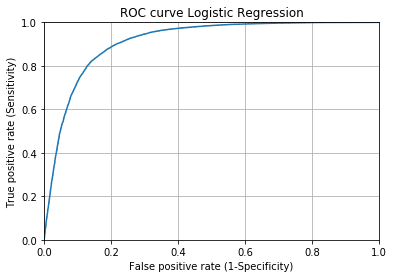

In [ ]:
y_pred_prob_yes=lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve Logistic Regression')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.show

In [ ]:
print('AUC Score: ',roc_auc_score(y_test,y_pred_prob_yes[:,1]))

AUC Score:  0.9119760565978157


### Model Cross Validation

In [ ]:
X1=pd.concat([X_train,X_test],axis=0)
y1=pd.concat([y_train,y_test],axis=0)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score = cross_val_score(lr, X1, y1, cv=kf, scoring='f1')
print('Logistic Regression \n Mean F1 Score \n',np.mean(score),'\n Varience of F1 Score \n',np.std(score))

Logistic Regression 
 Mean F1 Score 
 0.8174306123602181 
 Varience of F1 Score 
 0.003529995514770849


## Decision Tree Classifier

There are no assumptions for Desision Tree Classifier

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=20,test_size=0.3)

### Base Model

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_test_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.9386356636895596 

Train accuracy:  1.0 

Precision:  0.9295878451159363 

Recall:  0.9345149891713211 

F1 Score:  0.9320449054995027 

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94     21418
         1.0       0.93      0.93      0.93     17546

    accuracy                           0.94     38964
   macro avg       0.94      0.94      0.94     38964
weighted avg       0.94      0.94      0.94     38964
 



### Tuning model using Grid Search

In [ ]:
dtc = DecisionTreeClassifier()
params = {'max_depth':np.arange(10,21),'criterion':['gini','entropy'],'min_samples_split':np.arange(5,16)}
grid = GridSearchCV(estimator=dtc,param_grid=params,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 16, 'min_samples_split': 15}

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=16,min_samples_split=15)
dtc.fit(X_train,y_train)
y_test_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.9455908017657325 

Train accuracy:  0.9646816841920014 

Precision:  0.9307975871313673 

Recall:  0.9497891257266613 

F1 Score:  0.940197461212976 

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     21418
         1.0       0.93      0.95      0.94     17546

    accuracy                           0.95     38964
   macro avg       0.94      0.95      0.95     38964
weighted avg       0.95      0.95      0.95     38964
 



In [ ]:
from sklearn.tree import plot_tree

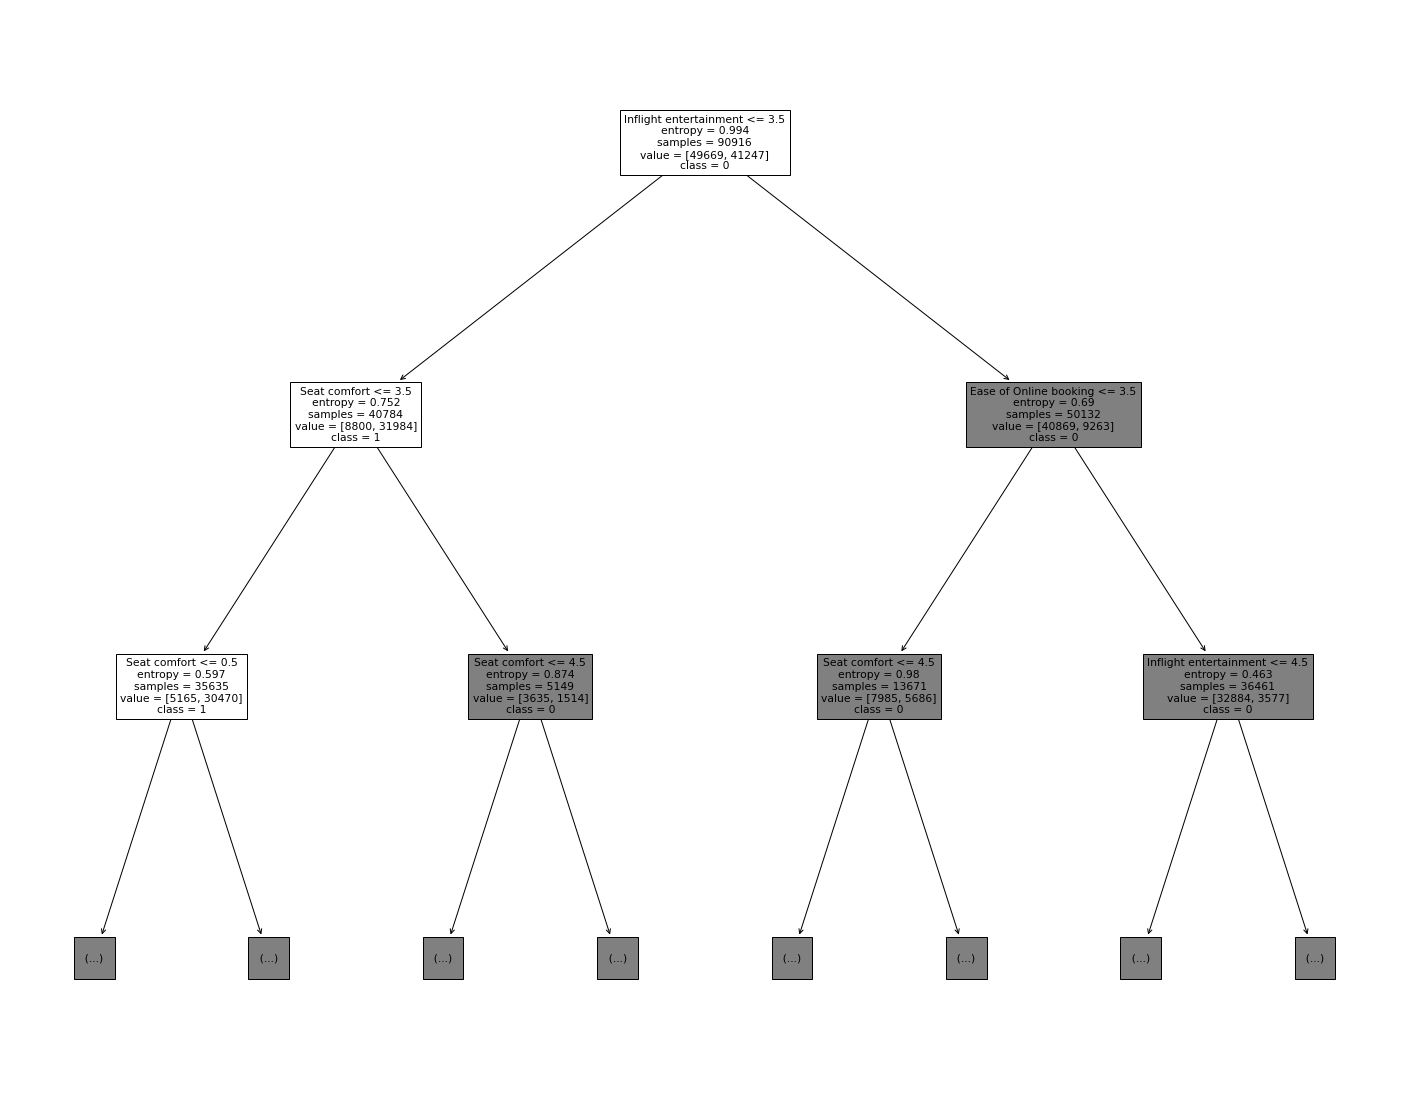

In [ ]:
plt.figure(figsize=(25,20))
plot_tree(dtc,feature_names=X_train.columns,class_names=['0','1'],max_depth=2)
plt.show()

### Confusion Matrix

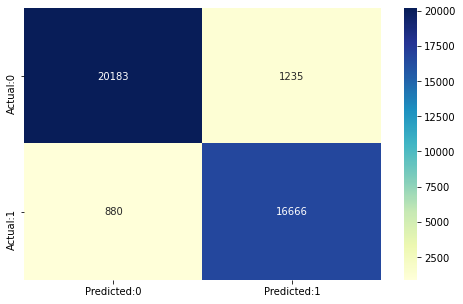

In [ ]:
cm=confusion_matrix(y_test,y_test_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

### Model Statistics

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print(' The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

 The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.9451031721589159 

 The Miss-classification = 1-Accuracy =  0.05489682784108407 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9491622022113302 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9417779437856009 

 Positive Predictive value = TP / (TP+FP) =  0.9303390872018323 

 Negative predictive Value = TN / (TN+FN) =  0.9576508569529507 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  16.302450719296118 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.05398066298337862


### ROC Curve and AUC Score

<function matplotlib.pyplot.show(*args, **kw)>

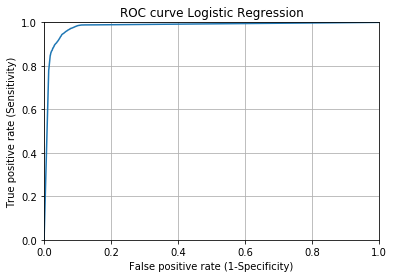

In [ ]:
y_pred_prob_yes=dtc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve Logistic Regression')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.show

In [ ]:
print('AUC Score: ',roc_auc_score(y_test,y_pred_prob_yes[:,1]))

AUC Score:  0.980358090682159


### Model Cross Validation

In [ ]:
X1=pd.concat([X_train,X_test],axis=0)
y1=pd.concat([y_train,y_test],axis=0)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score = cross_val_score(dtc, X1, y1, cv=kf, scoring='f1')
print('Decision Tree Classifier \n Mean F1 Score\n',np.mean(score),'\n Varience of F1 Score \n',np.std(score))

Decision Tree Classifier 
 Mean F1 Score
 0.9409496427731725 
 Varience of F1 Score 
 0.0006373370327578421


## Random Forest

There are no assumptions for Random Forest Model

### Base model

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.9585001539882969 

Train accuracy:  1.0 

Precision:  0.9450187182209309 

Recall:  0.963923401345036 

F1 Score:  0.9543774511186977 

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     21418
         1.0       0.95      0.96      0.95     17546

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964
 



### Tuning model using Grid Search

In [ ]:
rf = RandomForestClassifier(random_state=20)
params = {'n_estimators':np.arange(10,150,10),'max_depth':[10,20,30],'max_features':[2,4,6,8,10]}
grid = GridSearchCV(estimator=rf,param_grid=params,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'max_depth': 30, 'max_features': 8, 'n_estimators': 140}

In [ ]:
rfc = RandomForestClassifier(n_estimators=140,max_depth=30,max_features=8,random_state=20)
rfc.fit(X_train,y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.958833795298224 

Train accuracy:  0.9999780016718729 

Precision:  0.942440053285968 

Recall:  0.9676849424370226 

F1 Score:  0.9548956751588774 

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     21418
         1.0       0.94      0.97      0.95     17546

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964
 



### Confusion Matrix

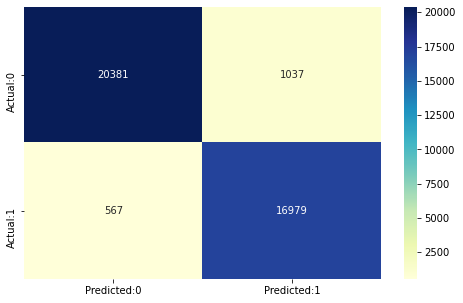

In [ ]:
cm=confusion_matrix(y_test,y_test_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

### Model Statistics

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print(' The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

 The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.958833795298224 

 The Miss-classification = 1-Accuracy =  0.04116620470177601 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9676849424370226 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.951582780838547 

 Positive Predictive value = TP / (TP+FP) =  0.942440053285968 

 Negative predictive Value = TN / (TN+FN) =  0.972932976895169 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  19.986380035791832 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.033959271031050946


### ROC Curve and AUC Score

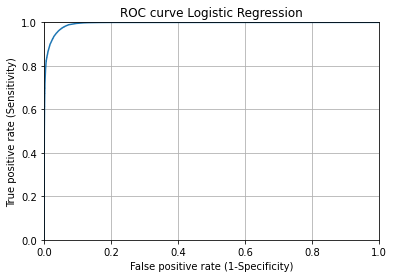

In [ ]:
y_pred_prob_yes=rfc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve Logistic Regression')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.show()

In [ ]:
print('AUC Score: ',roc_auc_score(y_test,y_pred_prob_yes[:,1]))

AUC Score:  0.9937434111934599


### Model Cross Validation

In [ ]:
X1=pd.concat([X_train,X_test],axis=0)
y1=pd.concat([y_train,y_test],axis=0)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score = cross_val_score(rfc, X1, y1, cv=kf, scoring='f1')
print('Random Forest Classifier \n Mean F1 Score\n',np.mean(score),'\n Varience of F1 Score \n',np.std(score)/np.mean(score))

Random Forest Classifier 
 Mean F1 Score
 0.9558429053435704 
 Varience of F1 Score 
 0.0009774298756136052


# Random Forest Model Feature Reduction

In [ ]:
featimp=pd.DataFrame()
featimp['FeatImp']=rfc.feature_importances_
featimp['Features']=X_train.columns
featimp2=featimp.sort_values('FeatImp',ascending=False).reset_index(drop=True)
featimp2

,FeatImp,Features
0,0.262682,Inflight entertainment
1,0.147281,Seat comfort
2,0.085305,Ease of Online booking
3,0.055946,Online support
4,0.038681,disloyal Customer
5,0.036690,On-board service
6,0.034416,Flight Distance
7,0.033757,Food and drink
8,0.031941,Leg room service
9,0.029249,Age


In [ ]:
trainaccscores=[]
testaccscores=[]
rocscores=[]
kfoldmeanscore=[]
kfoldvariancescore=[]
for i in range(1,21):
    rfc = RandomForestClassifier(n_estimators=140,max_depth=30,random_state=20)
    rfc.fit(X_train[featimp2[0:i]['Features']],y_train)
    y_test_pred = rfc.predict(X_test[featimp2[0:i]['Features']])
    y_train_pred = rfc.predict(X_train[featimp2[0:i]['Features']])
    trainaccscores.append(accuracy_score(y_train,y_train_pred))
    testaccscores.append(accuracy_score(y_test,y_test_pred))
    y_pred_prob_yes=rfc.predict_proba(X_test[featimp2[0:i]['Features']])
    rocscores.append(roc_auc_score(y_test,y_pred_prob_yes[:,1]))
    X1=pd.concat([X_train[featimp2[0:i]['Features']],X_test[featimp2[0:i]['Features']]],axis=0)
    y1=pd.concat([y_train,y_test],axis=0)
    kf=KFold(n_splits=5,shuffle=True,random_state=0)
    score = cross_val_score(rfc, X1, y1, cv=kf, scoring='f1')
    kfoldmeanscore.append(np.mean(score))
    kfoldvariancescore.append(np.std(score)/np.mean(score))
feature_scores=pd.DataFrame()
feature_scores['Train Accuracy']=trainaccscores
feature_scores['Test Accuracy']=testaccscores
feature_scores['AUC scores']=rocscores
feature_scores['Kfold Mean F1 score']=kfoldmeanscore
feature_scores['Kfold Variance F1 score']=kfoldvariancescore
feature_scores

,Train Accuracy,Test Accuracy,AUC scores,Kfold Mean F1 score,Kfold Variance F1 score
0,0.808296,0.812340,0.849364,0.782951,0.002971
1,0.846331,0.849759,0.923749,0.818666,0.003825
2,0.879779,0.879940,0.950821,0.867337,0.001426
3,0.891570,0.889590,0.958124,0.877890,0.002179
4,0.897752,0.893568,0.962602,0.882025,0.002668
5,0.913734,0.906811,0.968286,0.895732,0.001494
6,0.992741,0.883097,0.955722,0.870687,0.002509
7,0.997096,0.894467,0.962548,0.883983,0.002265
8,0.998966,0.911072,0.973148,0.903461,0.002405
9,0.999824,0.920953,0.978864,0.915024,0.001683


In [ ]:
feature_scores['Number of Features']=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
feature_scores

,Train Accuracy,Test Accuracy,AUC scores,Kfold Mean F1 score,Kfold Variance F1 score,Number of Features
0,0.808296,0.812340,0.849364,0.782951,0.002971,1
1,0.846331,0.849759,0.923749,0.818666,0.003825,2
2,0.879779,0.879940,0.950821,0.867337,0.001426,3
3,0.891570,0.889590,0.958124,0.877890,0.002179,4
4,0.897752,0.893568,0.962602,0.882025,0.002668,5
5,0.913734,0.906811,0.968286,0.895732,0.001494,6
6,0.992741,0.883097,0.955722,0.870687,0.002509,7
7,0.997096,0.894467,0.962548,0.883983,0.002265,8
8,0.998966,0.911072,0.973148,0.903461,0.002405,9
9,0.999824,0.920953,0.978864,0.915024,0.001683,10


In [ ]:
X_train2=X_train[featimp2[0:6]['Features']]
X_test2=X_test[featimp2[0:6]['Features']]

# Rebuilding Models with Limited Features

# Decision Tree

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=16,min_samples_split=15,random_state=20)
dtc.fit(X_train2,y_train)
y_test_pred = dtc.predict(X_test2)
y_train_pred = dtc.predict(X_train2)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.9066060979365568 

Train accuracy:  0.9125346473668001 

Precision:  0.9095353083220449 

Recall:  0.8801436224780577 

F1 Score:  0.8945981173062997 

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92     21418
         1.0       0.91      0.88      0.89     17546

    accuracy                           0.91     38964
   macro avg       0.91      0.90      0.91     38964
weighted avg       0.91      0.91      0.91     38964
 



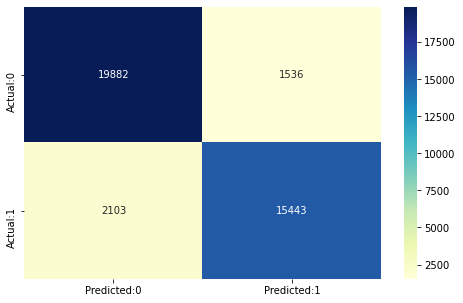

In [ ]:
cm=confusion_matrix(y_test,y_test_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print(' The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

 The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.9066060979365568 

 The Miss-classification = 1-Accuracy =  0.09339390206344322 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.8801436224780577 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.928284620412737 

 Positive Predictive value = TP / (TP+FP) =  0.9095353083220449 

 Negative predictive Value = TN / (TN+FN) =  0.9043438708210143 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  12.272731839996771 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.12911597896413646


<function matplotlib.pyplot.show>

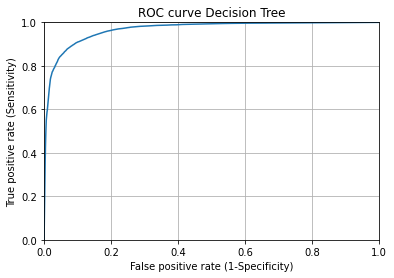

In [ ]:
y_pred_prob_yes=dtc.predict_proba(X_test2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve Decision Tree')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.show

In [ ]:
print('AUC Score: ',roc_auc_score(y_test,y_pred_prob_yes[:,1]))

AUC Score:  0.9671564129545978


In [ ]:
X1=pd.concat([X_train2,X_test2],axis=0)
y1=pd.concat([y_train,y_test],axis=0)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score = cross_val_score(dtc, X1, y1, cv=kf, scoring='f1')
print('Decision Tree Classifier \n Mean F1 Score\n',np.mean(score),'\n Varience of F1 Score \n',np.std(score))

Decision Tree Classifier 
 Mean F1 Score
 0.8951177940708235 
 Varience of F1 Score 
 0.0011781882881865993


# Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=140,max_depth=30,random_state=20)
rfc.fit(X_train2,y_train)
y_test_pred = rfc.predict(X_test2)
y_train_pred = rfc.predict(X_train2)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.9068114156657427 

Train accuracy:  0.9137335562497251 

Precision:  0.907992728552161 

Recall:  0.8824803373988374 

F1 Score:  0.8950547703690858 

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92     21418
         1.0       0.91      0.88      0.90     17546

    accuracy                           0.91     38964
   macro avg       0.91      0.90      0.91     38964
weighted avg       0.91      0.91      0.91     38964
 



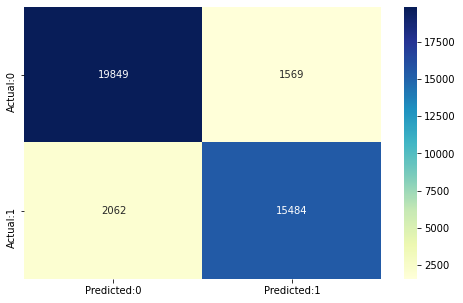

In [ ]:
cm=confusion_matrix(y_test,y_test_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print(' The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

 The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.9068114156657427 

 The Miss-classification = 1-Accuracy =  0.09318858433425725 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.8824803373988374 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9267438603044168 

 Positive Predictive value = TP / (TP+FP) =  0.907992728552161 

 Negative predictive Value = TN / (TN+FN) =  0.9058920177080005 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  12.046503420272968 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.12680921626236594


<function matplotlib.pyplot.show>

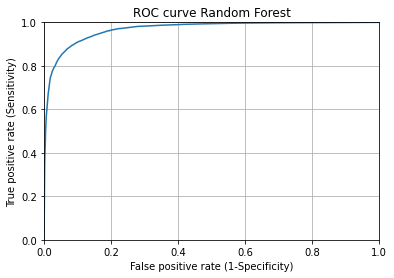

In [ ]:
y_pred_prob_yes=rfc.predict_proba(X_test2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve Random Forest')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.show

In [ ]:
print('AUC Score: ',roc_auc_score(y_test,y_pred_prob_yes[:,1]))

AUC Score:  0.9682862778891129


# XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train2,y_train)
y_test_pred = xgb.predict(X_test2)
y_train_pred = xgb.predict(X_train2)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.8905913150600554 

Train accuracy:  0.8879955123410621 

Precision:  0.8725946704067321 

Recall:  0.8864698506782173 

F1 Score:  0.8794775380961805 

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90     21418
         1.0       0.87      0.89      0.88     17546

    accuracy                           0.89     38964
   macro avg       0.89      0.89      0.89     38964
weighted avg       0.89      0.89      0.89     38964
 



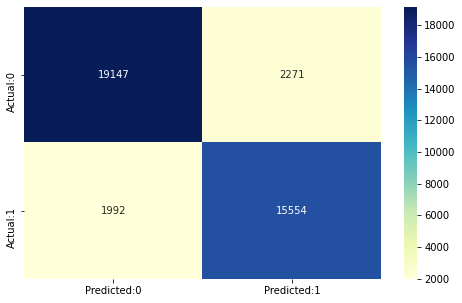

In [ ]:
cm=confusion_matrix(y_test,y_test_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print(' The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

 The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.8905913150600554 

 The Miss-classification = 1-Accuracy =  0.1094086849399446 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.8864698506782173 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.8939676907274255 

 Positive Predictive value = TP / (TP+FP) =  0.8725946704067321 

 Negative predictive Value = TN / (TN+FN) =  0.905766592554047 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  8.36037484008193 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.12699580812523856


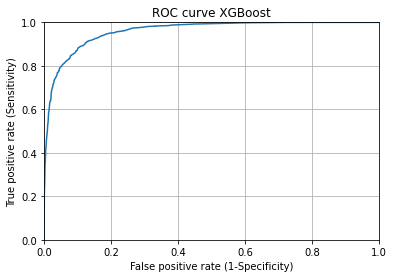

In [ ]:
y_pred_prob_yes=xgb.predict_proba(X_test2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve XGBoost')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.show()

In [ ]:
print('AUC Score: ',roc_auc_score(y_test,y_pred_prob_yes[:,1]))

AUC Score:  0.9595642555065188


In [ ]:
X1=pd.concat([X_train2,X_test2],axis=0)
y1=pd.concat([y_train,y_test],axis=0)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score = cross_val_score(xgb, X1, y1, cv=kf, scoring='f1')
print('XGBoost Classifier \n Mean F1 Score\n',np.mean(score),'\n Varience of F1 Score \n',np.std(score))

XGBoost Classifier 
 Mean F1 Score
 0.8757013738987467 
 Varience of F1 Score 
 0.0021703263543428517


# Submodels based on class

In [ ]:
air_fill['Class'].value_counts()

3.0    62160
1.0    58309
2.0     9411
Name: Class, dtype: int64

Where 1 is eco, 2 is eco plus and 3 is business class

In [12]:
air_eco = air_fill[air_fill['Class']==1]
air_eco_plus = air_fill[air_fill['Class']==2]
air_bus = air_fill[air_fill['Class']==3]

Economy Class EDA


Catagorical features for Economy

Plot of Seat comfort


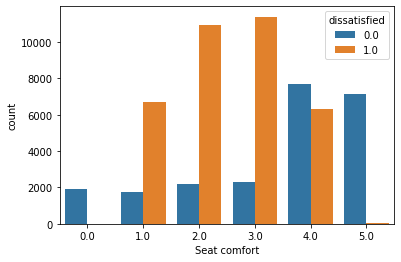

Plot of Departure/Arrival time convenient


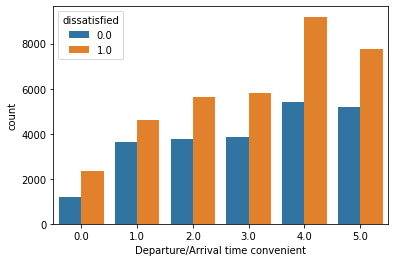

Plot of Food and drink


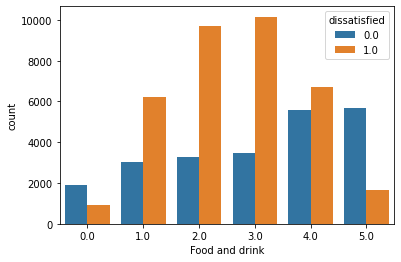

Plot of Gate location


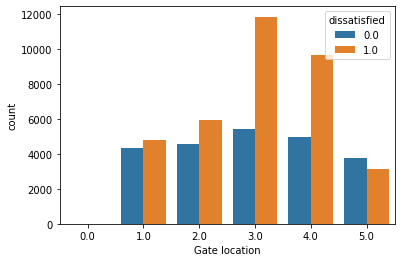

Plot of Inflight wifi service


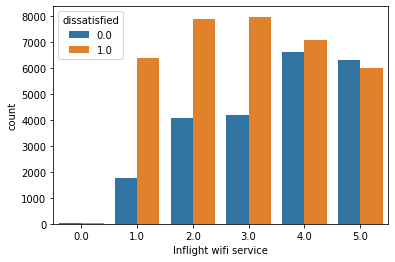

Plot of Inflight entertainment


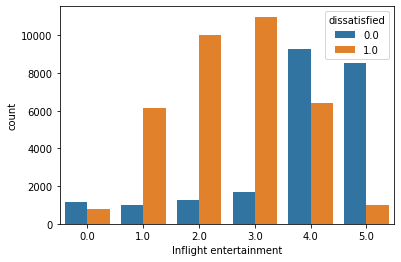

Plot of Online support


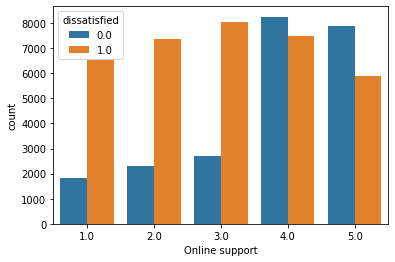

Plot of Ease of Online booking


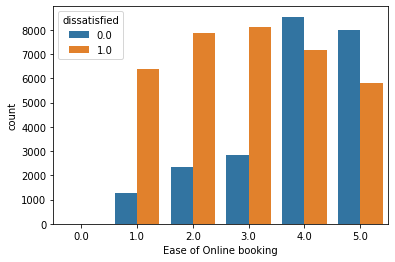

Plot of On-board service


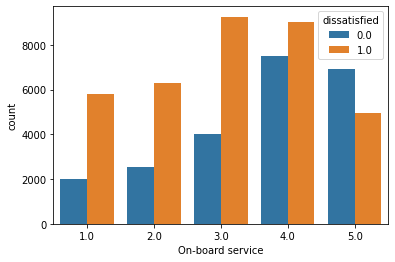

Plot of Leg room service


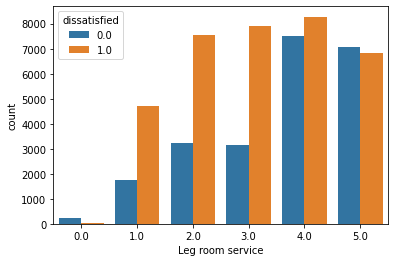

Plot of Baggage handling


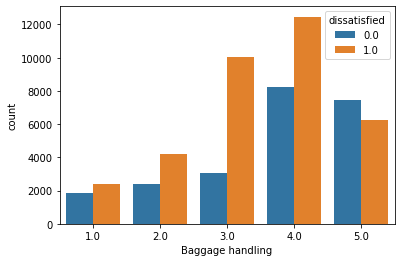

Plot of Checkin service


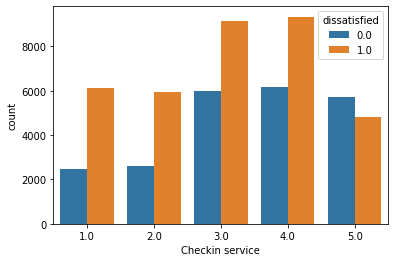

Plot of Cleanliness


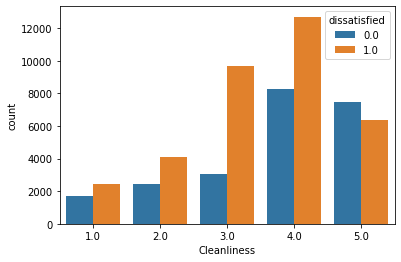

Plot of Online boarding


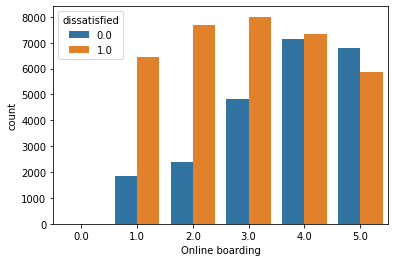

Plot of Male


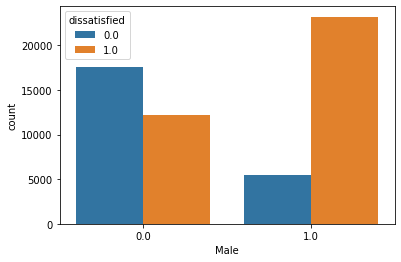

Plot of disloyal Customer


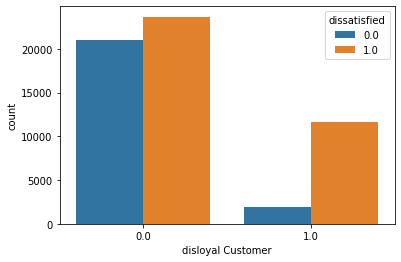

Plot of Personal Travel


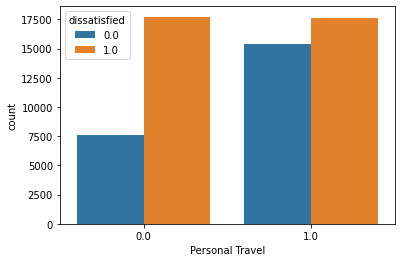

In [ ]:
air_eco_cat = air_eco.drop(['Age','Flight Distance','Average Delay in Minutes','dissatisfied','Class'],axis=1)
for i in air_eco_cat.columns:
  print('Plot of',i)
  sns.countplot(air_eco[i],hue=air_eco['dissatisfied'])
  plt.show()

Numerical Features Economy

Plot of Age


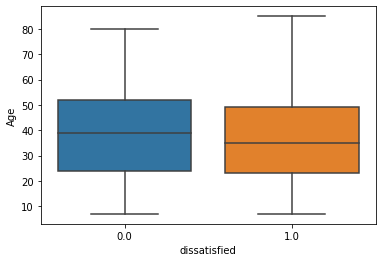

Plot of Flight Distance


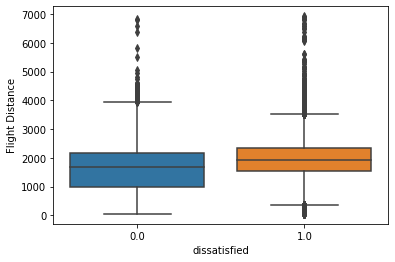

Plot of Average Delay in Minutes


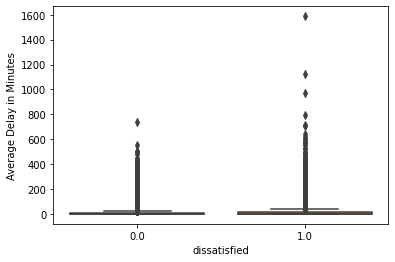

In [ ]:
air_eco_num = air_eco[['Age','Flight Distance','Average Delay in Minutes']]
for i in air_eco_num.columns:
  print('Plot of',i)
  sns.boxplot(y=air_eco[i],x=air_eco['dissatisfied'])
  plt.show()

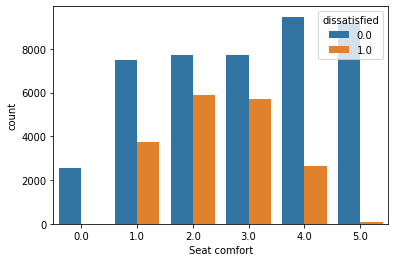

In [ ]:
sns.countplot(air_bus['Seat comfort'],hue=air_bus['dissatisfied'])
plt.show()

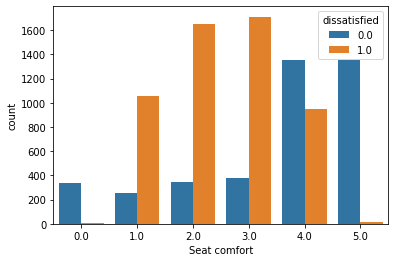

In [ ]:
sns.countplot(x='Seat comfort',hue='dissatisfied',data=air_fill_eco_plus)
plt.show()

Catagorical Features in Eco-plus

Plot of Seat comfort


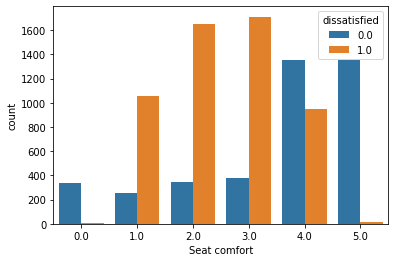

Plot of Departure/Arrival time convenient


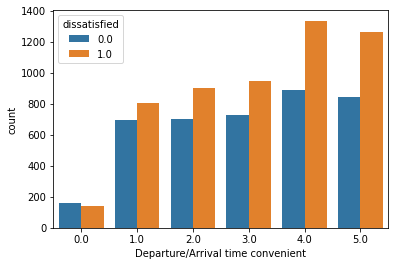

Plot of Food and drink


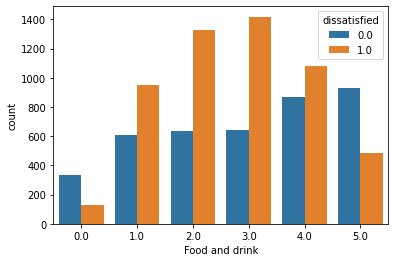

Plot of Gate location


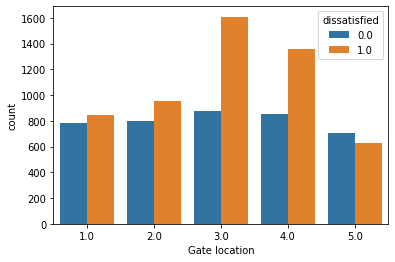

Plot of Inflight wifi service


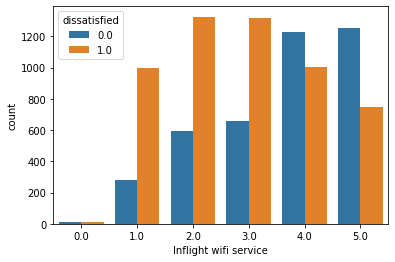

Plot of Inflight entertainment


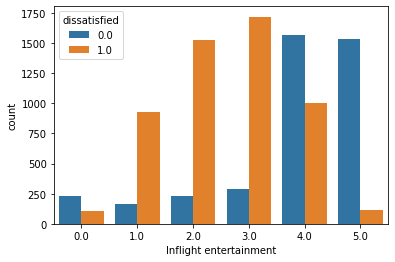

Plot of Online support


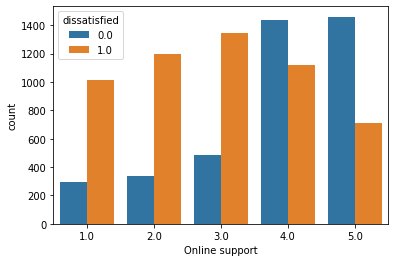

Plot of Ease of Online booking


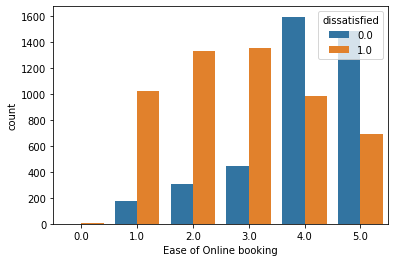

Plot of On-board service


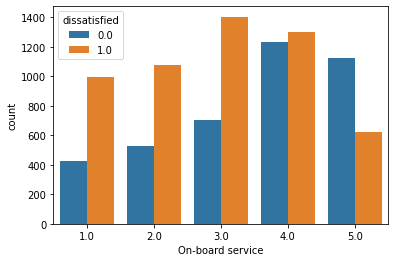

Plot of Leg room service


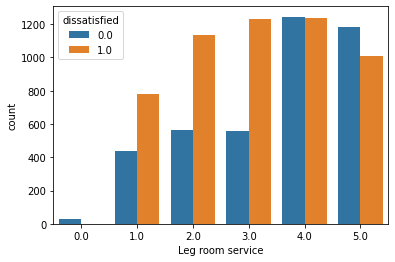

Plot of Baggage handling


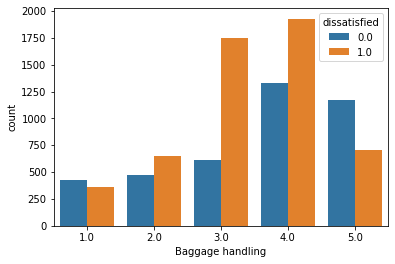

Plot of Checkin service


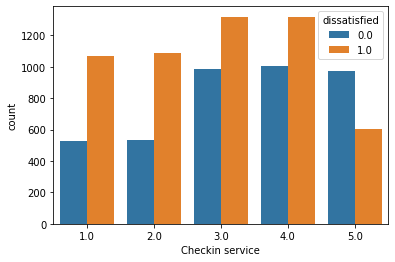

Plot of Cleanliness


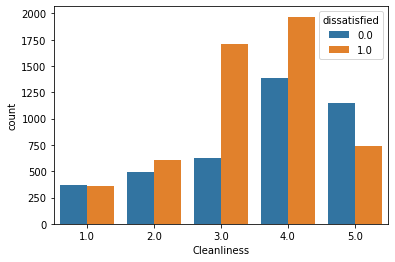

Plot of Online boarding


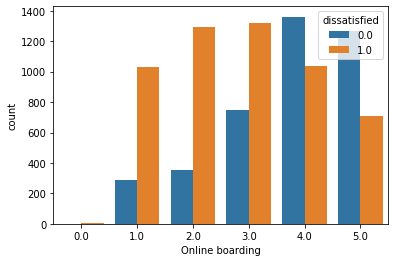

Plot of Male


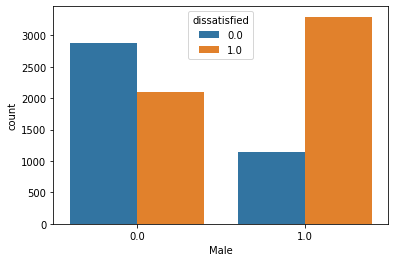

Plot of disloyal Customer


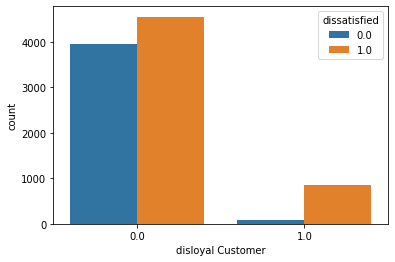

Plot of Personal Travel


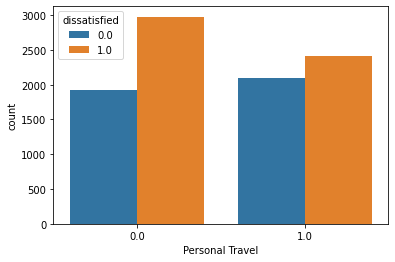

In [ ]:
air_eco_plus_cat = air_eco_plus.drop(['Age','Flight Distance','Average Delay in Minutes','dissatisfied','Class'],axis=1)
for i in air_eco_cat.columns:
  print('Plot of',i)
  sns.countplot(air_eco_plus[i],hue=air_eco_plus['dissatisfied'])
  plt.show()

Numerical Features Eco Plus

Plot of Age


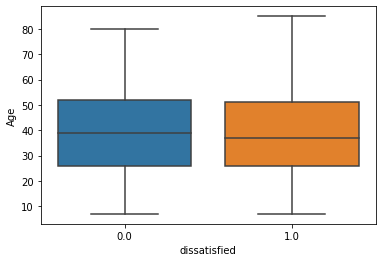

Plot of Flight Distance


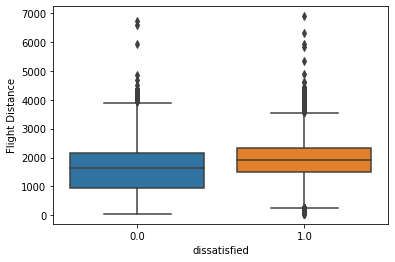

Plot of Average Delay in Minutes


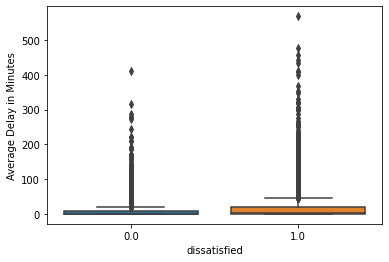

In [ ]:
air_eco_plus_num = air_eco_plus[['Age','Flight Distance','Average Delay in Minutes']]
for i in air_eco_plus_num.columns:
  print('Plot of',i)
  sns.boxplot(y=air_eco_plus[i],x=air_eco_plus['dissatisfied'])
  plt.show()

Catagorical Features Business Class

Plot of Seat comfort


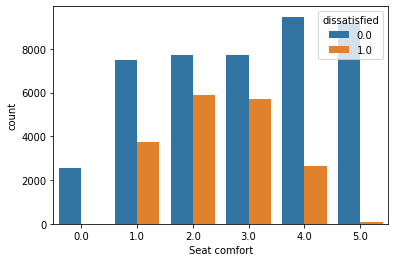

Plot of Departure/Arrival time convenient


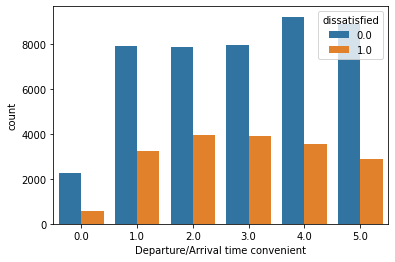

Plot of Food and drink


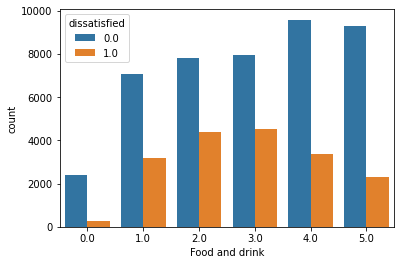

Plot of Gate location


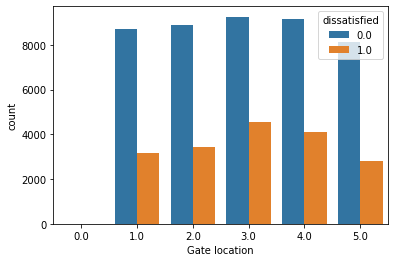

Plot of Inflight wifi service


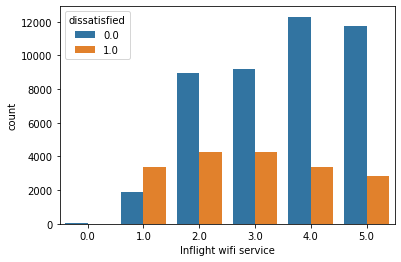

Plot of Inflight entertainment


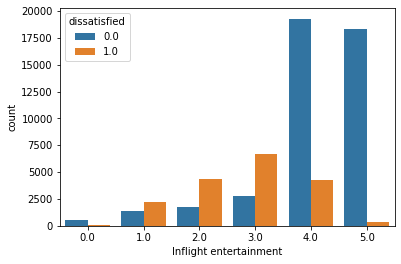

Plot of Online support


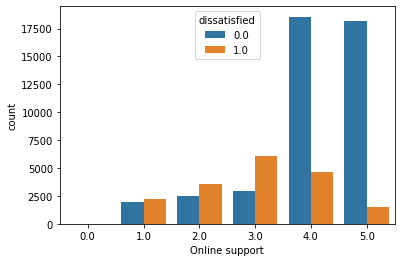

Plot of Ease of Online booking


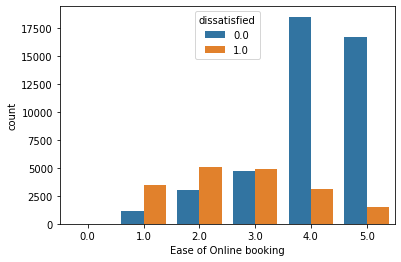

Plot of On-board service


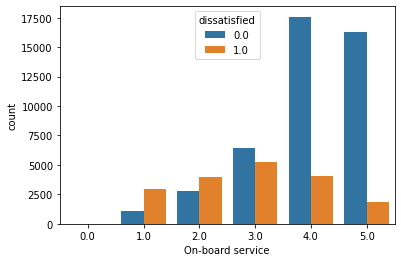

Plot of Leg room service


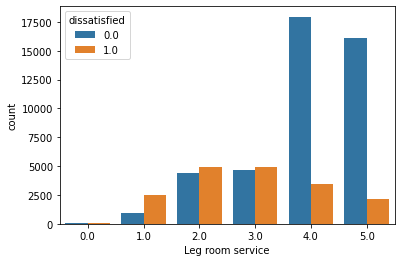

Plot of Baggage handling


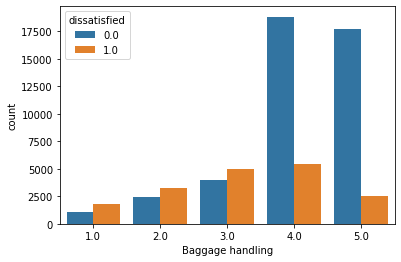

Plot of Checkin service


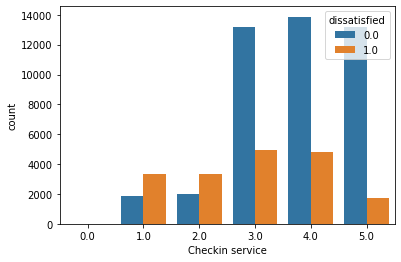

Plot of Cleanliness


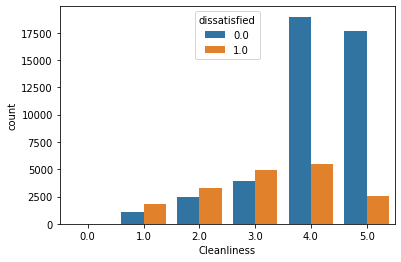

Plot of Online boarding


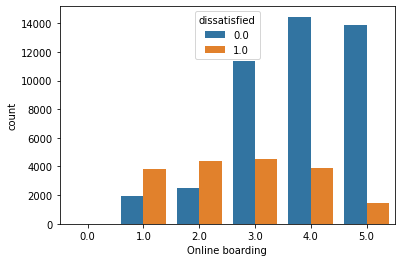

Plot of Male


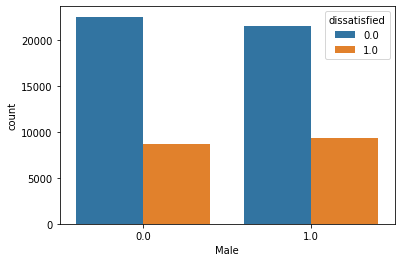

Plot of disloyal Customer


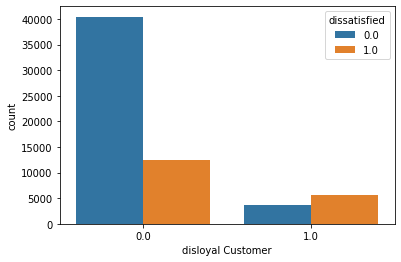

Plot of Personal Travel


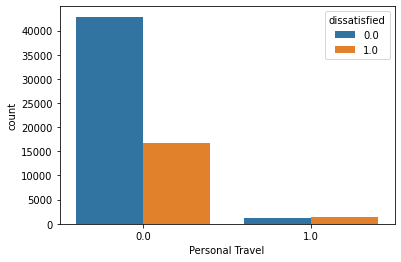

In [ ]:
air_bus_cat = air_bus.drop(['Age','Flight Distance','Average Delay in Minutes','dissatisfied','Class'],axis=1)
for i in air_bus_cat.columns:
  print('Plot of',i)
  sns.countplot(air_bus[i],hue=air_bus['dissatisfied'])
  plt.show()

Numerical Features Business Class

Plot of Age


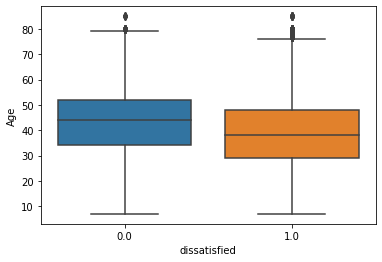

Plot of Flight Distance


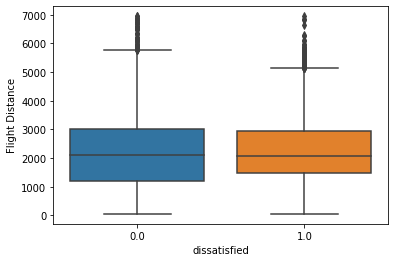

Plot of Average Delay in Minutes


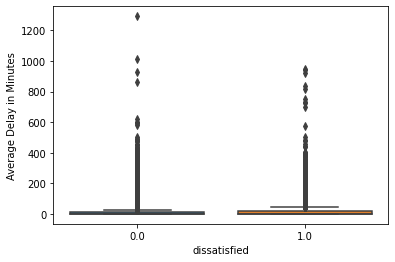

In [ ]:
air_bus_num = air_bus[['Age','Flight Distance','Average Delay in Minutes']]
for i in air_bus_num.columns:
  print('Plot of',i)
  sns.boxplot(y=air_bus[i],x=air_bus['dissatisfied'])
  plt.show()

# Statistical Tests

Average Delay in Minutes

In [ ]:
X1 = air_eco['Average Delay in Minutes']
X2 = air_eco_plus['Average Delay in Minutes']
X3 = air_bus['Average Delay in Minutes']

In [ ]:
stats.shapiro(X1)

(0.4289296269416809, 0.0)

In [ ]:
stats.shapiro(X2)

(0.4693838357925415, 0.0)

In [ ]:
stats.shapiro(X3)

(0.41018205881118774, 0.0)

pvalue is less than 0.05 therefore the data is not normal

In [ ]:
stats.mannwhitneyu(X1,X2)

MannwhitneyuResult(statistic=270281599.0, pvalue=0.007271251390519369)

In [ ]:
stats.mannwhitneyu(X1,X3)

MannwhitneyuResult(statistic=1794453431.0, pvalue=0.0009598321425637373)

In [ ]:
stats.mannwhitneyu(X2,X3)

MannwhitneyuResult(statistic=285188663.0, pvalue=1.9544258650077953e-05)

Average delay in minutues is important feature for all the classes

In [ ]:
stats.f_oneway(air_fill['Average Delay in Minutes'][air_fill['Class']==1],
               air_fill['Average Delay in Minutes'][air_fill['Class']==2],
               air_fill['Average Delay in Minutes'][air_fill['Class']==3])

F_onewayResult(statistic=10.52470657533371, pvalue=2.688737297385377e-05)

The average Delay in minutes is different for atleast one of the classes

Age

In [ ]:
X1 = air_eco['Age']
X2 = air_eco_plus['Age']
X3 = air_bus['Age']

In [ ]:
stats.shapiro(X1)

(0.971279501914978, 0.0)

In [ ]:
stats.shapiro(X2)

(0.9824033975601196, 1.6437948432689753e-32)

In [ ]:
stats.shapiro(X3)

(0.9927058815956116, 1.401298464324817e-45)

In [ ]:
stats.mannwhitneyu(X1,X2)

MannwhitneyuResult(statistic=259166911.5, pvalue=2.7544578273946855e-18)

In [ ]:
stats.mannwhitneyu(X1,X3)

MannwhitneyuResult(statistic=1498015397.5, pvalue=0.0)

In [ ]:
stats.mannwhitneyu(X2,X3)

MannwhitneyuResult(statistic=258708631.0, pvalue=1.845942183698013e-73)

In [ ]:
stats.f_oneway(air_fill['Age'][air_fill['Class']==1],
               air_fill['Age'][air_fill['Class']==2],
               air_fill['Age'][air_fill['Class']==3])

F_onewayResult(statistic=1317.07461088708, pvalue=0.0)

The mean age is signinificantly different for atleast one of the classes

Flight Distance

In [ ]:
X1 = air_eco['Flight Distance']
X2 = air_eco_plus['Flight Distance']
X3 = air_bus['Flight Distance']

In [ ]:
stats.shapiro(X1)

(0.9830406904220581, 0.0)

In [ ]:
stats.shapiro(X2)

(0.9788772463798523, 4.3860222575183147e-35)

In [ ]:
stats.shapiro(X3)

(0.9799805879592896, 0.0)

In [ ]:
stats.mannwhitneyu(X1,X2)

MannwhitneyuResult(statistic=266537074.5, pvalue=4.237812371730896e-06)

In [ ]:
stats.mannwhitneyu(X1,X3)

MannwhitneyuResult(statistic=1513614070.5, pvalue=0.0)

In [ ]:
stats.mannwhitneyu(X3,X2)

MannwhitneyuResult(statistic=238845483.5, pvalue=1.0374482013487389e-181)

Flight distance is important feature for all the classes

In [ ]:
stats.f_oneway(air_fill['Flight Distance'][air_fill['Class']==1],
               air_fill['Flight Distance'][air_fill['Class']==2],
               air_fill['Flight Distance'][air_fill['Class']==3])

F_onewayResult(statistic=1812.6716912625384, pvalue=0.0)

The mean flight distance is different for atleast one of the classes

# Catagorical Features

Class

In [ ]:
ct = pd.crosstab(air_eco['Seat comfort'],air['dissatisfied'])
ct

dissatisfied,0,1
Seat comfort,,
0.0,1898,4
1.0,1722,6698
2.0,2201,10919
3.0,2299,11386
4.0,7693,6299
5.0,7160,30


In [ ]:
stats.chi2_contingency(ct)

(22241.519873795445, 0.0, 5, array([[ 749.36366599, 1152.63633401],
        [3317.37227529, 5102.62772471],
        [5169.11214392, 7950.88785608],
        [5391.71491536, 8293.28508464],
        [5512.66898763, 8479.33101237],
        [2832.7680118 , 4357.2319882 ]]))

In [ ]:
ct = pd.crosstab(air_eco_plus['Seat comfort'],air['dissatisfied'])
ct

dissatisfied,0,1
Seat comfort,,
0.0,337,6
1.0,254,1058
2.0,345,1654
3.0,376,1711
4.0,1350,947
5.0,1357,16


In [ ]:
stats.chi2_contingency(ct)

(3783.9286214438644, 0.0, 5, array([[ 146.4793327 ,  196.5206673 ],
        [ 560.2941239 ,  751.7058761 ],
        [ 853.67984274, 1145.32015726],
        [ 891.26054617, 1195.73945383],
        [ 980.94177027, 1316.05822973],
        [ 586.34438423,  786.65561577]]))

In [ ]:
ct = pd.crosstab(air_bus['Seat comfort'],air['dissatisfied'])
ct

dissatisfied,0,1
Seat comfort,,
0.0,2552,0
1.0,7470,3747
2.0,7726,5881
3.0,7714,5697
4.0,9464,2645
5.0,9169,95


In [ ]:
stats.chi2_contingency(ct)

(7480.646244209503, 0.0, 5, array([[1810.33526384,  741.66473616],
        [7957.10448842, 3259.89551158],
        [9652.52035071, 3954.47964929],
        [9513.48206242, 3897.51793758],
        [8589.87057593, 3519.12942407],
        [6571.68725869, 2692.31274131]]))

Seat comfort is significant for all the classes as pvalue is less than 0.05 for all the classes

In [ ]:
ct = pd.crosstab(air_fill['Seat comfort'],air_fill['Class'])
ct

Class,1.0,2.0,3.0
Seat comfort,,,
0.0,1902,343,2552
1.0,8420,1312,11217
2.0,13120,1999,13607
3.0,13685,2087,13411
4.0,13992,2297,12109
5.0,7190,1373,9264


In [ ]:
stats.chisquare(list(ct[1.0]),list(ct[2.0]))

Power_divergenceResult(statistic=256106.3173212995, pvalue=0.0)

In [ ]:
stats.chisquare(list(ct[1.0]),list(ct[3.0]))

Power_divergenceResult(statistic=1643.1626574555985, pvalue=0.0)

In [ ]:
stats.chisquare(list(ct[2.0]),list(ct[3.0]))

Power_divergenceResult(statistic=44795.22349139897, pvalue=0.0)

The proportions of seat comfort is different for at least one of the classes.

Departure/Arrival time convienient

In [ ]:
ct = pd.crosstab(air_eco['Departure/Arrival time convenient'],air['dissatisfied'])
ct

dissatisfied,0,1
Departure/Arrival time convenient,,
0.0,1170,2360
1.0,3620,4588
2.0,3747,5610
3.0,3841,5816
4.0,5420,9195
5.0,5175,7767


In [ ]:
stats.chi2_contingency(ct)

(170.75924415858904,
 5.024626187123434e-35,
 5,
 array([[1390.7748375 , 2139.2251625 ],
        [3233.8469876 , 4974.1530124 ],
        [3686.5382874 , 5670.4617126 ],
        [3804.73444923, 5852.26555077],
        [5758.12301703, 8856.87698297],
        [5098.98242124, 7843.01757876]]))

In [ ]:
ct = pd.crosstab(air_eco_plus['Departure/Arrival time convenient'],air['dissatisfied'])
ct

dissatisfied,0,1
Departure/Arrival time convenient,,
0.0,163,139
1.0,696,803
2.0,699,904
3.0,730,945
4.0,890,1336
5.0,841,1265


In [ ]:
stats.chi2_contingency(ct)

(38.59274475678522,
 2.86795645530323e-07,
 5,
 array([[ 128.97014132,  173.02985868],
        [ 640.15311869,  858.84688131],
        [ 684.56667729,  918.43332271],
        [ 715.31452556,  959.68547444],
        [ 950.62097545, 1275.37902455],
        [ 899.37456168, 1206.62543832]]))

In [ ]:
ct = pd.crosstab(air_bus['Departure/Arrival time convenient'],air['dissatisfied'])
ct

dissatisfied,0,1
Departure/Arrival time convenient,,
0.0,2278,554
1.0,7895,3226
2.0,7866,3968
3.0,7935,3917
4.0,9213,3539
5.0,8908,2861


In [ ]:
stats.chi2_contingency(ct)

(469.53998746440516,
 2.990795575603636e-99,
 5,
 array([[2008.96138996,  823.03861004],
        [7889.00410232, 3231.99589768],
        [8394.79134492, 3439.20865508],
        [8407.56016731, 3444.43983269],
        [9046.001287  , 3705.998713  ],
        [8348.68170849, 3420.31829151]]))

Departure/Arrival time convenient is the import for all the classes

In [ ]:
ct = pd.crosstab(air_fill['Departure/Arrival time convenient'],air_fill['Class'])
ct

Class,1.0,2.0,3.0
Departure/Arrival time convenient,,,
0.0,3530,302,2832
1.0,8208,1499,11121
2.0,9357,1603,11834
3.0,9657,1675,11852
4.0,14615,2226,12752
5.0,12942,2106,11769


In [ ]:
stats.chisquare(list(ct[1.0]),list(ct[2.0]))

Power_divergenceResult(statistic=264781.6388000263, pvalue=0.0)

In [ ]:
stats.chisquare(list(ct[1.0]),list(ct[3.0]))

Power_divergenceResult(statistic=2249.125182874946, pvalue=0.0)

In [ ]:
stats.chisquare(list(ct[3.0]),list(ct[2.0]))

Power_divergenceResult(statistic=304200.9924663386, pvalue=0.0)

The proportions were different for different classes

Food and drink

In [ ]:
ct = pd.crosstab(air_eco['Food and drink'],air['dissatisfied'])
ct

dissatisfied,0,1
Food and drink,,
0.0,1902,925
1.0,3052,6206
2.0,3300,9681
3.0,3451,10156
4.0,5605,6694
5.0,5663,1674


In [ ]:
stats.chi2_contingency(ct)

(7849.561504333186, 0.0, 5, array([[1113.80183162, 1713.19816838],
        [3647.533554  , 5610.466446  ],
        [5114.34792228, 7866.65207772],
        [5360.98391329, 8246.01608671],
        [4845.64864772, 7453.35135228],
        [2890.68413109, 4446.31586891]]))

In [ ]:
ct = pd.crosstab(air_eco_plus['Food and drink'],air['dissatisfied'])
ct

dissatisfied,0,1
Food and drink,,
0.0,333,127
1.0,607,951
2.0,633,1328
3.0,642,1418
4.0,871,1082
5.0,933,486


In [ ]:
stats.chi2_contingency(ct)

(684.7086524565283,
 9.939950678638163e-146,
 5,
 array([[ 196.44458612,  263.55541388],
        [ 665.34927213,  892.65072787],
        [ 837.45181171, 1123.54818829],
        [ 879.73010307, 1180.26989693],
        [ 834.03538412, 1118.96461588],
        [ 605.98884284,  813.01115716]]))

In [ ]:
ct = pd.crosstab(air_bus['Food and drink'],air['dissatisfied'])
ct

dissatisfied,0,1
Food and drink,,
0.0,2398,260
1.0,7056,3204
2.0,7807,4397
3.0,7969,4514
4.0,9587,3377
5.0,9278,2313


In [ ]:
stats.chi2_contingency(ct)

(1618.4938268667302, 0.0, 5, array([[1885.52944015,  772.47055985],
        [7278.22876448, 2981.77123552],
        [8657.26158301, 3546.73841699],
        [8855.17833012, 3627.82166988],
        [9196.38963964, 3767.61036036],
        [8222.4122426 , 3368.5877574 ]]))

Food and drink is an important feature for all the classes

In [ ]:
ct = pd.crosstab(air_fill['Food and drink'],air_fill['Class'])
ct

Class,1.0,2.0,3.0
Food and drink,,,
0.0,2827,460,2658
1.0,9258,1558,10260
2.0,12981,1961,12204
3.0,13607,2060,12483
4.0,12299,1953,12964
5.0,7337,1419,11591


In [ ]:
stats.chisquare(list(ct[1.0]),list(ct[2.0]))

Power_divergenceResult(statistic=256376.72196118117, pvalue=0.0)

In [ ]:
stats.chisquare(list(ct[1.0]),list(ct[3.0]))

Power_divergenceResult(statistic=1854.6464970548263, pvalue=0.0)

In [ ]:
stats.chisquare(list(ct[3.0]),list(ct[2.0]))

Power_divergenceResult(statistic=300343.8383759441, pvalue=0.0)

For food and drink the proportion for the ratings is significantly different for atleast one of the classes

Gate Location

In [ ]:
ct = pd.crosstab(air_eco['Gate location'],air['dissatisfied'])
ct

dissatisfied,0,1
Gate location,,
0.0,1,0
1.0,4317,4769
2.0,4547,5908
3.0,5402,11840
4.0,4966,9669
5.0,3740,3150


In [ ]:
stats.chi2_contingency(ct)

(1617.8478718406157, 0.0, 5, array([[3.93987206e-01, 6.06012794e-01],
        [3.57976775e+03, 5.50623225e+03],
        [4.11913624e+03, 6.33586376e+03],
        [6.79312741e+03, 1.04488726e+04],
        [5.76600276e+03, 8.86899724e+03],
        [2.71457185e+03, 4.17542815e+03]]))

In [ ]:
ct = pd.crosstab(air_eco_plus['Gate location'],air['dissatisfied'])
ct

dissatisfied,0,1
Gate location,,
1.0,783,842
2.0,796,955
3.0,877,1608
4.0,855,1358
5.0,708,629


In [ ]:
stats.chi2_contingency(ct)

(153.5686700122355,
 3.498478050000398e-32,
 4,
 array([[ 693.96185315,  931.03814685],
        [ 747.77058761, 1003.22941239],
        [1061.22781851, 1423.77218149],
        [ 945.06928063, 1267.93071937],
        [ 570.9704601 ,  766.0295399 ]]))

In [ ]:
ct = pd.crosstab(air_bus['Gate location'],air['dissatisfied'])
ct

dissatisfied,0,1
Gate location,,
0.0,1,0
1.0,8687,3167
2.0,8880,3432
3.0,9255,4564
4.0,9158,4082
5.0,8114,2820


In [ ]:
stats.chi2_contingency(ct)

(222.66170944255003,
 3.997140308409335e-46,
 5,
 array([[7.09379022e-01, 2.90620978e-01],
        [8.40897893e+03, 3.44502107e+03],
        [8.73387452e+03, 3.57812548e+03],
        [9.80290870e+03, 4.01609130e+03],
        [9.39217825e+03, 3.84782175e+03],
        [7.75635023e+03, 3.17764977e+03]]))

Gate location is an important feature for all the classes as pvalue is less than 0.05 for all the cases

In [ ]:
ct = pd.crosstab(air_fill['Gate location'],air_fill['Class'])
ct

Class,1.0,2.0,3.0
Gate location,,,
0.0,1,0,1
1.0,9086,1625,11854
2.0,10455,1751,12312
3.0,17242,2485,13819
4.0,14635,2213,13240
5.0,6890,1337,10934


In [ ]:
stats.chisquare(list(ct[1.0]),list(ct[2.0]))

Power_divergenceResult(statistic=inf, pvalue=0.0)

In [ ]:
stats.chisquare(list(ct[3.0]),list(ct[2.0]))

Power_divergenceResult(statistic=inf, pvalue=0.0)

In [ ]:
stats.chisquare(list(ct[1.0]),list(ct[3.0]))

Power_divergenceResult(statistic=3416.999515559779, pvalue=0.0)

For gate location the proportion of ratings is different for different classes

Inflight wifi service

In [ ]:
ct = pd.crosstab(air_eco['Inflight wifi service'],air['dissatisfied'])
ct

dissatisfied,0,1
Inflight wifi service,,
0.0,24,49
1.0,1768,6368
2.0,4058,7889
3.0,4206,7974
4.0,6618,7076
5.0,6299,5980


In [ ]:
stats.chi2_contingency(ct)

(2519.064965741789, 0.0, 5, array([[  28.76106604,   44.23893396],
        [3205.47990876, 4930.52009124],
        [4706.96515118, 7240.03484882],
        [4798.7641702 , 7381.2358298 ],
        [5395.26080022, 8298.73919978],
        [4837.7689036 , 7441.2310964 ]]))

In [ ]:
ct = pd.crosstab(air_eco_plus['Inflight wifi service'],air['dissatisfied'])
ct

dissatisfied,0,1
Inflight wifi service,,
0.0,11,11
1.0,280,995
2.0,592,1325
3.0,660,1315
4.0,1225,1001
5.0,1251,745


In [ ]:
stats.chi2_contingency(ct)

(867.431894924399,
 2.973242443864806e-185,
 5,
 array([[   9.39517586,   12.60482414],
        [ 544.49314632,  730.50685368],
        [ 818.66145999, 1098.33854001],
        [ 843.43055998, 1131.56944002],
        [ 950.62097545, 1275.37902455],
        [ 852.39868239, 1143.60131761]]))

In [ ]:
ct = pd.crosstab(air_bus['Inflight wifi service'],air['dissatisfied'])
ct

dissatisfied,0,1
Inflight wifi service,,
0.0,24,13
1.0,1901,3399
2.0,8931,4250
3.0,9201,4246
4.0,12294,3346
5.0,11744,2811


In [ ]:
stats.chi2_contingency(ct)

(4385.552373804907, 0.0, 5, array([[2.62470238e+01, 1.07529762e+01],
        [3.75970882e+03, 1.54029118e+03],
        [9.35032489e+03, 3.83067511e+03],
        [9.53901971e+03, 3.90798029e+03],
        [1.10946879e+04, 4.54531210e+03],
        [1.03250117e+04, 4.22998834e+03]]))

Inflight wifi service is important feature for all the classes as pvalue is less than 0.05 for all the classes

In [ ]:
ct = pd.crosstab(air_fill['Inflight wifi service'],air_fill['Class'])
ct

Class,1.0,2.0,3.0
Inflight wifi service,,,
0.0,73,22,37
1.0,8136,1275,5300
2.0,11947,1917,13181
3.0,12180,1975,13447
4.0,13694,2226,15640
5.0,12279,1996,14555


In [ ]:
stats.chisquare(list(ct[1.0]),list(ct[2.0]))

Power_divergenceResult(statistic=254304.23674877442, pvalue=0.0)

In [ ]:
stats.chisquare(list(ct[3.0]),list(ct[2.0]))

Power_divergenceResult(statistic=305394.29070438637, pvalue=0.0)

In [ ]:
stats.chisquare(list(ct[1.0]),list(ct[3.0]))

Power_divergenceResult(statistic=2385.4938521204567, pvalue=0.0)

For inflight wifi service the proportion of ratings is different for different classes

Inflight entertainment

In [ ]:
ct = pd.crosstab(air_eco['Inflight entertainment'],air['dissatisfied'])
ct

dissatisfied,0,1
Inflight entertainment,,
0.0,1177,787
1.0,990,6155
2.0,1255,9993
3.0,1712,10985
4.0,9284,6432
5.0,8555,984


In [ ]:
stats.chi2_contingency(ct)

(22278.420152758692, 0.0, 5, array([[ 773.79087276, 1190.20912724],
        [2815.03858753, 4329.96141247],
        [4431.56809412, 6816.43190588],
        [5002.45555575, 7694.54444425],
        [6191.90293094, 9524.09706906],
        [3758.24395891, 5780.75604109]]))

In [ ]:
ct = pd.crosstab(air_eco_plus['Inflight entertainment'],air['dissatisfied'])
ct

dissatisfied,0,1
Inflight entertainment,,
0.0,232,105
1.0,161,929
2.0,227,1525
3.0,292,1719
4.0,1570,1002
5.0,1537,112


In [ ]:
stats.chi2_contingency(ct)

(3800.675341528885, 0.0, 5, array([[ 143.91701201,  193.08298799],
        [ 465.48825842,  624.51174158],
        [ 748.19764106, 1003.80235894],
        [ 858.80448411, 1152.19551589],
        [1098.38146849, 1473.61853151],
        [ 704.2111359 ,  944.7888641 ]]))

In [ ]:
ct = pd.crosstab(air_bus['Inflight entertainment'],air['dissatisfied'])
ct

dissatisfied,0,1
Inflight entertainment,,
0.0,557,120
1.0,1333,2241
2.0,1789,4394
3.0,2811,6681
4.0,19296,4295
5.0,18309,334


In [ ]:
stats.chi2_contingency(ct)

(23231.434459730714, 0.0, 5, array([[  480.24959781,   196.75040219],
        [ 2535.3206242 ,  1038.6793758 ],
        [ 4386.09049228,  1796.90950772],
        [ 6733.42567568,  2758.57432432],
        [16734.96050515,  6856.03949485],
        [13224.95310489,  5418.04689511]]))

Inflight entertainment is an important for feature for all the classes as pvalue is less than 0.05

In [ ]:
ct = pd.crosstab(air_fill['Inflight entertainment'],air_fill['Class'])
ct

Class,1.0,2.0,3.0
Inflight entertainment,,,
0.0,1964,337,677
1.0,7145,1090,3574
2.0,11248,1752,6183
3.0,12697,2011,9492
4.0,15716,2572,23591
5.0,9539,1649,18643


In [ ]:
stats.chisquare(list(ct[1.0]),list(ct[2.0]))

Power_divergenceResult(statistic=254665.74806886958, pvalue=0.0)

In [ ]:
stats.chisquare(list(ct[3.0]),list(ct[2.0]))

Power_divergenceResult(statistic=391946.2587690591, pvalue=0.0)

In [ ]:
stats.chisquare(list(ct[1.0]),list(ct[3.0]))

Power_divergenceResult(statistic=18320.535982408812, pvalue=0.0)

In case of inflight entertainment the proportion of ratings is different for different classes

Online Support

In [ ]:
ct = pd.crosstab(air_eco['Online support'],air['dissatisfied'])
ct

dissatisfied,0,1
Online support,,
1.0,1827,6542
2.0,2306,7380
3.0,2698,8053
4.0,8251,7490
5.0,7891,5871


In [ ]:
stats.chi2_contingency(ct)

(15643.578836285134, 0.0, 5, array([[7.09379022e-01, 2.90620978e-01],
        [3.02124525e+03, 1.23775475e+03],
        [4.28110240e+03, 1.75389760e+03],
        [6.40001754e+03, 2.62198246e+03],
        [1.64668152e+04, 6.74618477e+03],
        [1.39251102e+04, 5.70488980e+03]]))

In [ ]:
ct = pd.crosstab(air_eco_plus['Online support'],air['dissatisfied'])
ct

dissatisfied,0,1
Online support,,
1.0,293,1016
2.0,339,1200
3.0,488,1348
4.0,1439,1117
5.0,1460,711


In [ ]:
stats.chi2_contingency(ct)

(1412.5839105876173,
 1.2909217608889928e-304,
 4,
 array([[ 559.01296355,  749.98703645],
        [ 657.23525661,  881.76474339],
        [ 784.0701307 , 1051.9298693 ],
        [1091.54861332, 1464.45138668],
        [ 927.13303581, 1243.86696419]]))

In [ ]:
ct = pd.crosstab(air_bus['Online support'],air['dissatisfied'])
ct

dissatisfied,0,1
Online support,,
0.0,0,1
1.0,1993,2266
2.0,2474,3561
3.0,2924,6098
4.0,18558,4655
5.0,18146,1484


In [ ]:
stats.chi2_contingency(ct)

(15643.578836285134, 0.0, 5, array([[7.09379022e-01, 2.90620978e-01],
        [3.02124525e+03, 1.23775475e+03],
        [4.28110240e+03, 1.75389760e+03],
        [6.40001754e+03, 2.62198246e+03],
        [1.64668152e+04, 6.74618477e+03],
        [1.39251102e+04, 5.70488980e+03]]))

Online support is an important feature for all the classes as pvalue is less than 0.05 

In [ ]:
ct = pd.crosstab(air_fill['Online support'],air_fill['Class'])
ct

Class,1.0,2.0,3.0
Online support,,,
0.0,0,0,1
1.0,8369,1309,4259
2.0,9686,1539,6035
3.0,10751,1836,9022
4.0,15741,2556,23213
5.0,13762,2171,19630


In [ ]:
stats.chisquare(list(ct[1.0]),list(ct[2.0]))

Power_divergenceResult(statistic=nan, pvalue=nan)

In [ ]:
stats.chisquare(list(ct[3.0]),list(ct[2.0]))

Power_divergenceResult(statistic=inf, pvalue=0.0)

In [ ]:
stats.chisquare(list(ct[1.0]),list(ct[3.0]))

Power_divergenceResult(statistic=10666.586061861057, pvalue=0.0)

In case online booking the proportion of ratings is different for different classes

Ease of Online booking

In [ ]:
ct = pd.crosstab(air_eco['Ease of Online booking'],air['dissatisfied'])
ct

dissatisfied,0,1
Ease of Online booking,,
0.0,0,4
1.0,1268,6365
2.0,2352,7864
3.0,2835,8112
4.0,8542,7177
5.0,7976,5814


In [ ]:
stats.chi2_contingency(ct)

(7079.810076620618, 0.0, 5, array([[1.57594882e+00, 2.42405118e+00],
        [3.00730434e+03, 4.62569566e+03],
        [4.02497330e+03, 6.19102670e+03],
        [4.31297795e+03, 6.63402205e+03],
        [6.19308489e+03, 9.52591511e+03],
        [5.43308357e+03, 8.35691643e+03]]))

In [ ]:
ct = pd.crosstab(air_eco_plus['Ease of Online booking'],air['dissatisfied'])
ct

dissatisfied,0,1
Ease of Online booking,,
0.0,0,6
1.0,174,1023
2.0,310,1330
3.0,449,1353
4.0,1598,987
5.0,1488,693


In [ ]:
stats.chi2_contingency(ct)

(1971.9341352391516, 0.0, 5, array([[   2.56232069,    3.43767931],
        [ 511.18297737,  685.81702263],
        [ 700.36765487,  939.63234513],
        [ 769.55031346, 1032.44968654],
        [1103.93316332, 1481.06683668],
        [ 931.40357029, 1249.59642971]]))

In [ ]:
ct = pd.crosstab(air_bus['Ease of Online booking'],air['dissatisfied'])
ct

dissatisfied,0,1
Ease of Online booking,,
0.0,0,8
1.0,1150,3456
2.0,3049,5046
3.0,4731,4938
4.0,18500,3116
5.0,16665,1501


In [ ]:
stats.chi2_contingency(ct)

(17421.045853603337, 0.0, 5, array([[5.67503218e+00, 2.32496782e+00],
        [3.26739977e+03, 1.33860023e+03],
        [5.74242318e+03, 2.35257682e+03],
        [6.85898576e+03, 2.81001424e+03],
        [1.53339369e+04, 6.28206306e+03],
        [1.28865793e+04, 5.27942069e+03]]))

Ease of online booking is an important feature for all the classes as pvalue is less than 0.05

On-board service

In [ ]:
ct = pd.crosstab(air_eco['On-board service'],air['dissatisfied'])
ct

dissatisfied,0,1
On-board service,,
1.0,2006,5826
2.0,2561,6278
3.0,3999,9260
4.0,7502,9014
5.0,6905,4958


In [ ]:
stats.chi2_contingency(ct)

(3508.1618322199984, 0.0, 4, array([[ 3085.70779811,  4746.29220189],
        [ 3482.45291464,  5356.54708536],
        [ 5223.87636557,  8035.12363443],
        [ 6507.09269581, 10008.90730419],
        [ 4673.87022587,  7189.12977413]]))

In [ ]:
ct = pd.crosstab(air_eco['On-board service'],air['dissatisfied'])
ct

dissatisfied,0,1
On-board service,,
1.0,2006,5826
2.0,2561,6278
3.0,3999,9260
4.0,7502,9014
5.0,6905,4958


In [ ]:
stats.chi2_contingency(ct)

(3508.1618322199984, 0.0, 4, array([[ 3085.70779811,  4746.29220189],
        [ 3482.45291464,  5356.54708536],
        [ 5223.87636557,  8035.12363443],
        [ 6507.09269581, 10008.90730419],
        [ 4673.87022587,  7189.12977413]]))

In [ ]:
ct = pd.crosstab(air_eco['On-board service'],air['dissatisfied'])
ct

dissatisfied,0,1
On-board service,,
1.0,2006,5826
2.0,2561,6278
3.0,3999,9260
4.0,7502,9014
5.0,6905,4958


In [ ]:
stats.chi2_contingency(ct)

(3508.1618322199984, 0.0, 4, array([[ 3085.70779811,  4746.29220189],
        [ 3482.45291464,  5356.54708536],
        [ 5223.87636557,  8035.12363443],
        [ 6507.09269581, 10008.90730419],
        [ 4673.87022587,  7189.12977413]]))

On-board service is an import feature for all the classes as pvalue is less than 0.05

Leg room service

In [ ]:
ct = pd.crosstab(air_eco['Leg room service'],air['dissatisfied'])
ct

dissatisfied,0,1
Leg room service,,
0.0,232,26
1.0,1768,4724
2.0,3218,7539
3.0,3151,7924
4.0,7525,8277
5.0,7079,6846


In [ ]:
stats.chi2_contingency(ct)

(2849.689299474154, 0.0, 5, array([[ 101.64869917,  156.35130083],
        [2557.76494195, 3934.23505805],
        [4238.12037593, 6518.87962407],
        [4363.40830747, 6711.59169253],
        [6225.78583066, 9576.21416934],
        [5486.27184483, 8438.72815517]]))

In [ ]:
ct = pd.crosstab(air_eco_plus['Leg room service'],air['dissatisfied'])
ct

dissatisfied,0,1
Leg room service,,
0.0,31,1
1.0,435,782
2.0,566,1135
3.0,558,1229
4.0,1245,1236
5.0,1184,1009


In [ ]:
stats.chi2_contingency(ct)

(391.3699685657149,
 2.1484039679988563e-82,
 5,
 array([[  13.66571034,   18.33428966],
        [ 519.72404633,  697.27595367],
        [ 726.41791521,  974.58208479],
        [ 763.14451174, 1023.85548826],
        [1059.51960472, 1421.48039528],
        [ 936.52821167, 1256.47178833]]))

In [ ]:
ct = pd.crosstab(air_bus['Leg room service'],air['dissatisfied'])
ct

dissatisfied,0,1
Leg room service,,
0.0,44,110
1.0,958,2474
2.0,4402,4885
3.0,4645,4960
4.0,17944,3471
5.0,16102,2165


In [ ]:
stats.chi2_contingency(ct)

(12427.040492115764, 0.0, 5, array([[  109.24436937,    44.75563063],
        [ 2434.58880309,   997.41119691],
        [ 6588.00297619,  2698.99702381],
        [ 6813.58550515,  2791.41449485],
        [15191.35175354,  6223.64824646],
        [12958.22659266,  5308.77340734]]))

Leg room service is an important feature as pvalue is less than 0.05

Male

In [ ]:
ct = pd.crosstab(air_eco['Male'],air['dissatisfied'])
ct

dissatisfied,0,1
Male,,
0.0,17529,12141
1.0,5444,23195


In [ ]:
stats.chi2_contingency(ct)

(9798.470736014418, 0.0, 1, array([[11689.60040474, 17980.39959526],
        [11283.39959526, 17355.60040474]]))

In [ ]:
ct = pd.crosstab(air_eco_plus['Male'],air['dissatisfied'])
ct

dissatisfied,0,1
Male,,
0.0,2870,2096
1.0,1149,3296


In [ ]:
stats.chi2_contingency(ct)

(976.8718838261865,
 1.912244743439457e-214,
 1,
 array([[2120.74742323, 2845.25257677],
        [1898.25257677, 2546.74742323]]))

In [ ]:
ct = pd.crosstab(air_bus['Male'],air['dissatisfied'])
ct

dissatisfied,0,1
Male,,
0.0,22529,8734
1.0,21566,9331


In [ ]:
stats.chi2_contingency(ct)

(38.49703576119725,
 5.483690976206106e-10,
 1,
 array([[22177.316361,  9085.683639],
        [21917.683639,  8979.316361]]))

Gender is an important feature for all the classes as pvalue is less than 0.05 for all the classes

Disloyal Customer

In [ ]:
ct = pd.crosstab(air_eco['disloyal Customer'],air['dissatisfied'])
ct

dissatisfied,0,1
disloyal Customer,,
0.0,21008,23667
1.0,1965,11669


In [ ]:
stats.chi2_contingency(ct)

(4651.6188195724535, 0.0, 1, array([[17601.37843215, 27073.62156785],
        [ 5371.62156785,  8262.37843215]]))

In [ ]:
ct = pd.crosstab(air_eco_plus['disloyal Customer'],air['dissatisfied'])
ct

dissatisfied,0,1
disloyal Customer,,
0.0,3946,4550
1.0,73,842


In [ ]:
stats.chi2_contingency(ct)

(497.9867477140983,
 2.6062442069718555e-110,
 1,
 array([[3628.246095, 4867.753905],
        [ 390.753905,  524.246095]]))

In [ ]:
ct = pd.crosstab(air_bus['disloyal Customer'],air['dissatisfied'])
ct

dissatisfied,0,1
disloyal Customer,,
0.0,40433,12496
1.0,3662,5569


In [ ]:
stats.chi2_contingency(ct)

(5139.123165030567, 0.0, 1, array([[37546.72224903, 15382.27775097],
        [ 6548.27775097,  2682.72224903]]))

Type of customer is an important feature for all the classes as p values are less than 0.05 

Personal Travel

In [ ]:
ct = pd.crosstab(air_eco['Personal Travel'],air['dissatisfied'])
ct

dissatisfied,0,1
Personal Travel,,
0.0,7578,17726
1.0,15395,17610


In [ ]:
stats.chi2_contingency(ct)

(1671.6470089011777, 0.0, 1, array([[ 9969.45226294, 15334.54773706],
        [13003.54773706, 20001.45226294]]))

In [ ]:
ct = pd.crosstab(air_eco_plus['Personal Travel'],air['dissatisfied'])
ct

dissatisfied,0,1
Personal Travel,,
0.0,1925,2977
1.0,2094,2415


In [ ]:
stats.chi2_contingency(ct)

(49.06480327257787,
 2.476442105776807e-12,
 1,
 array([[2093.41600255, 2808.58399745],
        [1925.58399745, 2583.41600255]]))

In [ ]:
ct = pd.crosstab(air_bus['Personal Travel'],air['dissatisfied'])
ct

dissatisfied,0,1
Personal Travel,,
0.0,42853,16634
1.0,1242,1431


In [ ]:
stats.chi2_contingency(ct)

(810.2181210445688,
 3.2394788869277056e-178,
 1,
 array([[42198.82987452, 17288.17012548],
        [ 1896.17012548,   776.82987452]]))

Type of travel is an important feature for all the classes as pvalues is less than 0.05

In case of most of the features the proportion of ratings is different for different classes

In [ ]:
X = air_eco.drop(['dissatisfied','Class'],axis=1)
y = air_eco.dissatisfied

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_test_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.9161378837249186 

Train accuracy:  1.0 

Precision:  0.934044065387349 

Recall:  0.9274523641496119 

F1 Score:  0.9307365439093483 

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      4577
         1.0       0.93      0.93      0.93      7085

    accuracy                           0.92     11662
   macro avg       0.91      0.91      0.91     11662
weighted avg       0.92      0.92      0.92     11662
 



In [ ]:
dtc = DecisionTreeClassifier()
params = {'max_depth':np.arange(10,21),'criterion':['gini','entropy'],'min_samples_split':np.arange(5,16)}
grid = GridSearchCV(estimator=dtc,param_grid=params,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 8}

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=13,min_samples_split=8)
dtc.fit(X_train,y_train)
y_test_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.924969987995198 

Train accuracy:  0.9502861920380732 

Precision:  0.9210740439381611 

Recall:  0.9586450247000706 

F1 Score:  0.9394840583719483 

              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90      4577
         1.0       0.92      0.96      0.94      7085

    accuracy                           0.92     11662
   macro avg       0.93      0.92      0.92     11662
weighted avg       0.93      0.92      0.92     11662
 



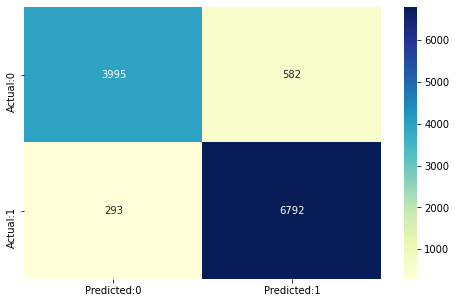

In [ ]:
cm=confusion_matrix(y_test,y_test_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

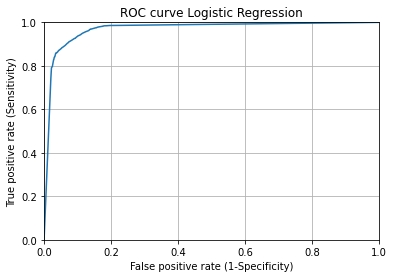

In [ ]:
y_pred_prob_yes=dtc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve Logistic Regression')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.show()

In [ ]:
print('AUC Score: ',roc_auc_score(y_test,y_pred_prob_yes[:,1]))

AUC Score:  0.9691120294177462


In [ ]:
X1=pd.concat([X_train,X_test],axis=0)
y1=pd.concat([y_train,y_test],axis=0)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score = cross_val_score(dtc, X1, y1, cv=kf, scoring='f1')
print('Decision Tree Classifier \n Mean F1 Score\n',np.mean(score),'\n Varience of F1 Score \n',np.std(score))

Decision Tree Classifier 
 Mean F1 Score
 0.9424443724147533 
 Varience of F1 Score 
 0.0026403956594625707


In [ ]:
feat_imp = pd.DataFrame(dtc.feature_importances_,index=X_train.columns,columns=['imp'])
feat_imp.sort_values(by='imp',ascending=False)

,imp
Seat comfort,0.309868
Inflight entertainment,0.299822
Personal Travel,0.074323
Food and drink,0.047189
Male,0.040734
Average Delay in Minutes,0.030704
Departure/Arrival time convenient,0.030554
disloyal Customer,0.025584
Checkin service,0.017124
Ease of Online booking,0.016560


In [ ]:
X = air_eco_plus.drop(['dissatisfied','Class'],axis=1)
y = air_eco_plus.dissatisfied

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_test_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.898371104815864 

Train accuracy:  1.0 

Precision:  0.9132947976878613 

Recall:  0.9034307496823379 

F1 Score:  0.9083359948898114 

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89      1250
         1.0       0.91      0.90      0.91      1574

    accuracy                           0.90      2824
   macro avg       0.90      0.90      0.90      2824
weighted avg       0.90      0.90      0.90      2824
 



In [ ]:
dtc = DecisionTreeClassifier()
params = {'max_depth':np.arange(10,21),'criterion':['gini','entropy'],'min_samples_split':np.arange(5,16)}
grid = GridSearchCV(estimator=dtc,param_grid=params,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 16, 'min_samples_split': 14}

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=16,min_samples_split=14)
dtc.fit(X_train,y_train)
y_test_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.9079320113314447 

Train accuracy:  0.960376499165022 

Precision:  0.9126884422110553 

Recall:  0.923125794155019 

F1 Score:  0.917877447883765 

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      1250
         1.0       0.91      0.92      0.92      1574

    accuracy                           0.91      2824
   macro avg       0.91      0.91      0.91      2824
weighted avg       0.91      0.91      0.91      2824
 



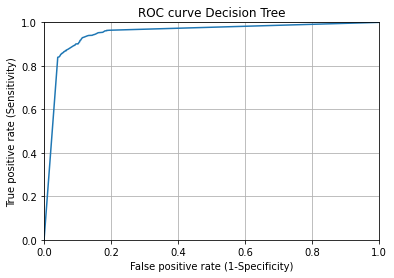

In [ ]:
y_pred_prob_yes=dtc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve Decision Tree')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.show()

In [ ]:
print('AUC Score: ',roc_auc_score(y_test,y_pred_prob_yes[:,1]))

AUC Score:  0.9487651842439644


In [ ]:
X1=pd.concat([X_train,X_test],axis=0)
y1=pd.concat([y_train,y_test],axis=0)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score = cross_val_score(dtc, X1, y1, cv=kf, scoring='f1')
print('Decision Tree Classifier \n Mean F1 Score\n',np.mean(score),'\n Varience of F1 Score \n',np.std(score))

Decision Tree Classifier 
 Mean F1 Score
 0.9207928511313941 
 Varience of F1 Score 
 0.004418524914608928


In [ ]:
feat_imp = pd.DataFrame(dtc.feature_importances_,index=X_train.columns,columns=['imp'])
feat_imp.sort_values(by='imp',ascending=False)

,imp
Seat comfort,0.309063
Inflight entertainment,0.292434
Personal Travel,0.052499
Flight Distance,0.043098
Ease of Online booking,0.040590
Age,0.034218
Baggage handling,0.028387
Average Delay in Minutes,0.027514
Gate location,0.022083
Cleanliness,0.021637


In [ ]:
X = air_bus.drop(['dissatisfied','Class'],axis=1)
y = air_bus.dissatisfied

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_test_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.9622479622479623 

Train accuracy:  1.0 

Precision:  0.9345401353081002 

Recall:  0.9365951988271944 

F1 Score:  0.935566538531942 

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     13191
         1.0       0.93      0.94      0.94      5457

    accuracy                           0.96     18648
   macro avg       0.95      0.95      0.95     18648
weighted avg       0.96      0.96      0.96     18648
 



In [ ]:
dtc = DecisionTreeClassifier()
params = {'max_depth':np.arange(10,21),'criterion':['gini','entropy'],'min_samples_split':np.arange(5,16)}
grid = GridSearchCV(estimator=dtc,param_grid=params,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 13}

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=19,min_samples_split=13)
dtc.fit(X_train,y_train)
y_test_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.9661625911625912 

Train accuracy:  0.9842572164000736 

Precision:  0.9398468829748451 

Recall:  0.944841487997068 

F1 Score:  0.9423375673946816 

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98     13191
         1.0       0.94      0.94      0.94      5457

    accuracy                           0.97     18648
   macro avg       0.96      0.96      0.96     18648
weighted avg       0.97      0.97      0.97     18648
 



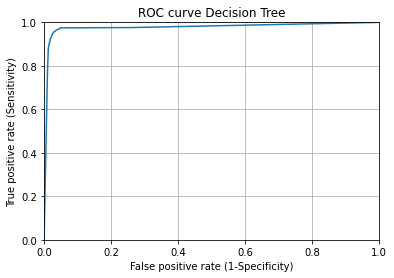

In [ ]:
y_pred_prob_yes=dtc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve Decision Tree')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.show()

In [ ]:
print('AUC Score: ',roc_auc_score(y_test,y_pred_prob_yes[:,1]))

AUC Score:  0.9773943707238598


In [ ]:
X1=pd.concat([X_train,X_test],axis=0)
y1=pd.concat([y_train,y_test],axis=0)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score = cross_val_score(dtc, X1, y1, cv=kf, scoring='f1')
print('Decision Tree Classifier \n Mean F1 Score\n',np.mean(score),'\n Varience of F1 Score \n',np.std(score))

Decision Tree Classifier 
 Mean F1 Score
 0.9386827424511225 
 Varience of F1 Score 
 0.0016831742893982557


In [ ]:
feat_imp = pd.DataFrame(dtc.feature_importances_,index=X_train.columns,columns=['imp'])
feat_imp.sort_values(by='imp',ascending=False)

,imp
Inflight entertainment,0.383411
Seat comfort,0.145577
Ease of Online booking,0.111818
disloyal Customer,0.076362
Checkin service,0.048198
Gate location,0.046201
Leg room service,0.027378
Personal Travel,0.024477
Age,0.024071
Online support,0.022900


# Economy Class

In [ ]:
X = air_eco.drop(['Class','dissatisfied'],axis=1)
y = air_eco.dissatisfied
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=20,test_size=0.3)

In [ ]:
rfc = RandomForestClassifier(random_state=20)
rfc.fit(X_train,y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.9388898416509461 

Train accuracy:  0.9999754998039985 

Precision:  0.9392935982339956 

Recall:  0.9614913849919969 

F1 Score:  0.9502628762853023 

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92      6872
         1.0       0.94      0.96      0.95     10621

    accuracy                           0.94     17493
   macro avg       0.94      0.93      0.94     17493
weighted avg       0.94      0.94      0.94     17493
 



In [ ]:
rf = RandomForestClassifier(random_state=20)
params = {'n_estimators':np.arange(100,150,10),'max_depth':[10,20,30],'max_features':[2,4,6,8,10]}
grid = GridSearchCV(estimator=rf,param_grid=params,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'max_depth': 20, 'max_features': 10, 'n_estimators': 120}

In [ ]:
rfc = RandomForestClassifier(n_estimators=120,max_depth=20,max_features=10,random_state=20)
rfc.fit(X_train,y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.9593984190534852 

Train accuracy:  0.9958093184917947 

Precision:  0.9423631123919308 

Recall:  0.9691097686082298 

F1 Score:  0.9555493116043833 

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     21418
         1.0       0.94      0.97      0.96     17546

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964
 



In [ ]:
featimp=pd.DataFrame()
featimp['FeatImp']=rfc.feature_importances_
featimp['Features']=X_train.columns
featimp2=featimp.sort_values('FeatImp',ascending=False).reset_index(drop=True)
featimp2

,FeatImp,Features
0,0.250332,Inflight entertainment
1,0.230507,Seat comfort
2,0.068750,Personal Travel
3,0.064407,Male
4,0.043313,Food and drink
5,0.041529,Flight Distance
6,0.032501,Average Delay in Minutes
7,0.030727,disloyal Customer
8,0.030657,Ease of Online booking
9,0.030531,Age


In [ ]:
trainaccscores=[]
testaccscores=[]
rocscores=[]
kfoldmeanscore=[]
kfoldvariancescore=[]
for i in range(1,21):
    rfc = RandomForestClassifier(n_estimators=140,max_depth=30,random_state=20)
    rfc.fit(X_train[featimp2[0:i]['Features']],y_train)
    y_test_pred = rfc.predict(X_test[featimp2[0:i]['Features']])
    y_train_pred = rfc.predict(X_train[featimp2[0:i]['Features']])
    trainaccscores.append(accuracy_score(y_train,y_train_pred))
    testaccscores.append(accuracy_score(y_test,y_test_pred))
    y_pred_prob_yes=rfc.predict_proba(X_test[featimp2[0:i]['Features']])
    rocscores.append(roc_auc_score(y_test,y_pred_prob_yes[:,1]))
    X1=pd.concat([X_train[featimp2[0:i]['Features']],X_test[featimp2[0:i]['Features']]],axis=0)
    y1=pd.concat([y_train,y_test],axis=0)
    kf=KFold(n_splits=5,shuffle=True,random_state=0)
    score = cross_val_score(rfc, X1, y1, cv=kf, scoring='f1')
    kfoldmeanscore.append(np.mean(score))
    kfoldvariancescore.append(np.std(score)/np.mean(score))
feature_scores=pd.DataFrame()
feature_scores['Train Accuracy']=trainaccscores
feature_scores['Test Accuracy']=testaccscores
feature_scores['AUC scores']=rocscores
feature_scores['Kfold Mean F1 score']=kfoldmeanscore
feature_scores['Kfold Variance F1 score']=kfoldvariancescore
feature_scores

,Train Accuracy,Test Accuracy,AUC scores,Kfold Mean F1 score,Kfold Variance F1 score
0,0.791503,0.791345,0.833075,0.816941,0.002556
1,0.834991,0.835534,0.924505,0.856159,0.003255
2,0.855718,0.854742,0.936586,0.880469,0.000830
3,0.890068,0.886983,0.962196,0.904583,0.001630
4,0.898692,0.895158,0.967667,0.914312,0.001411
5,0.983609,0.873035,0.953308,0.893926,0.002501
6,0.995002,0.881838,0.960948,0.905976,0.002857
7,0.995565,0.889156,0.964658,0.910636,0.002705
8,0.999118,0.896759,0.967664,0.915071,0.001921
9,0.999975,0.907906,0.973727,0.924308,0.001417


In [ ]:
feature_scores['Number of Features']=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
feature_scores

,Train Accuracy,Test Accuracy,AUC scores,Kfold Mean F1 score,Kfold Variance F1 score,Number of Features
0,0.791503,0.791345,0.833075,0.816941,0.002556,1
1,0.834991,0.835534,0.924505,0.856159,0.003255,2
2,0.855718,0.854742,0.936586,0.880469,0.000830,3
3,0.890068,0.886983,0.962196,0.904583,0.001630,4
4,0.898692,0.895158,0.967667,0.914312,0.001411,5
5,0.983609,0.873035,0.953308,0.893926,0.002501,6
6,0.995002,0.881838,0.960948,0.905976,0.002857,7
7,0.995565,0.889156,0.964658,0.910636,0.002705,8
8,0.999118,0.896759,0.967664,0.915071,0.001921,9
9,0.999975,0.907906,0.973727,0.924308,0.001417,10


In [13]:
X  = air_eco[['Inflight entertainment','Seat comfort','Personal Travel','Male','Food and drink','Flight Distance','Average Delay in Minutes','disloyal Customer','Ease of Online booking']]
y = air_eco.dissatisfied
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=20,test_size=0.3)

In [14]:
rfc = RandomForestClassifier(random_state=20)
rfc.fit(X_train,y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.8965872063110959 

Train accuracy:  0.9991914935319482 

Precision:  0.9127013862869989 

Recall:  0.9174277375011769 

F1 Score:  0.9150584589378785 

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      6872
         1.0       0.91      0.92      0.92     10621

    accuracy                           0.90     17493
   macro avg       0.89      0.89      0.89     17493
weighted avg       0.90      0.90      0.90     17493
 



In [15]:
rf = RandomForestClassifier(random_state=20)
params = {'n_estimators':np.arange(100,150,10),'max_depth':[10,20,30],'max_features':[2,4,6,8,10]}
grid = GridSearchCV(estimator=rf,param_grid=params,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'max_depth': 10, 'max_features': 4, 'n_estimators': 110}

In [16]:
rfc = RandomForestClassifier(n_estimators=110,max_depth=10,max_features=4,random_state=20)
rfc.fit(X_train,y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.914251414851655 

Train accuracy:  0.9208153665229322 

Precision:  0.9219169210842816 

Recall:  0.9382355710385086 

F1 Score:  0.9300046663555762 

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      6872
         1.0       0.92      0.94      0.93     10621

    accuracy                           0.91     17493
   macro avg       0.91      0.91      0.91     17493
weighted avg       0.91      0.91      0.91     17493
 



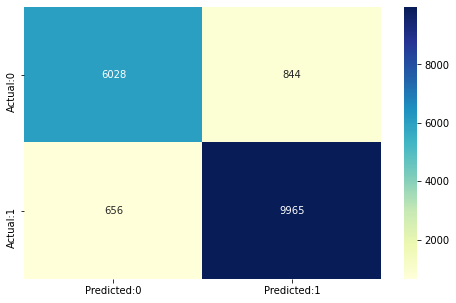

In [17]:
cm=confusion_matrix(y_test,y_test_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

### Model Statistics

In [18]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print(' The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

 The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.914251414851655 

 The Miss-classification = 1-Accuracy =  0.08574858514834505 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9382355710385086 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.8771827706635623 

 Positive Predictive value = TP / (TP+FP) =  0.9219169210842816 

 Negative predictive Value = TN / (TN+FN) =  0.9018551765409935 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  7.639282990730608 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.07041226871655087


### ROC Curve and AUC Score

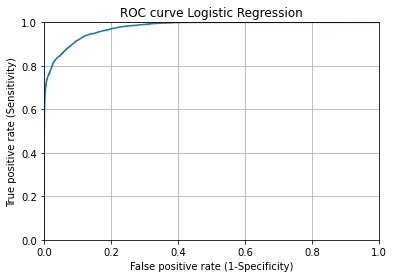

In [19]:
y_pred_prob_yes=rfc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve Logistic Regression')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.show()

In [20]:
print('AUC Score: ',roc_auc_score(y_test,y_pred_prob_yes[:,1]))

AUC Score:  0.9761423433641635


# Eco Plus

In [ ]:
X = air_eco_plus.drop(['Class','dissatisfied'],axis=1)
y = air_eco_plus.dissatisfied
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=20,test_size=0.3)

In [ ]:
rfc = RandomForestClassifier(random_state=20)
rfc.fit(X_train,y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.9327195467422096 

Train accuracy:  1.0 

Precision:  0.9368686868686869 

Recall:  0.9428208386277002 

F1 Score:  0.9398353388220393 

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      1250
         1.0       0.94      0.94      0.94      1574

    accuracy                           0.93      2824
   macro avg       0.93      0.93      0.93      2824
weighted avg       0.93      0.93      0.93      2824
 



In [ ]:
featimp=pd.DataFrame()
featimp['FeatImp']=rfc.feature_importances_
featimp['Features']=X_train.columns
featimp2=featimp.sort_values('FeatImp',ascending=False).reset_index(drop=True)
featimp2

,FeatImp,Features
0,0.186789,Inflight entertainment
1,0.180941,Seat comfort
2,0.070425,Ease of Online booking
3,0.058526,Flight Distance
4,0.047225,Male
5,0.046772,Online support
6,0.045546,Food and drink
7,0.038422,Age
8,0.036882,Personal Travel
9,0.029761,Baggage handling


In [ ]:
trainaccscores=[]
testaccscores=[]
rocscores=[]
kfoldmeanscore=[]
kfoldvariancescore=[]
for i in range(1,21):
    rfc = RandomForestClassifier(n_estimators=140,max_depth=30,random_state=20)
    rfc.fit(X_train[featimp2[0:i]['Features']],y_train)
    y_test_pred = rfc.predict(X_test[featimp2[0:i]['Features']])
    y_train_pred = rfc.predict(X_train[featimp2[0:i]['Features']])
    trainaccscores.append(accuracy_score(y_train,y_train_pred))
    testaccscores.append(accuracy_score(y_test,y_test_pred))
    y_pred_prob_yes=rfc.predict_proba(X_test[featimp2[0:i]['Features']])
    rocscores.append(roc_auc_score(y_test,y_pred_prob_yes[:,1]))
    X1=pd.concat([X_train[featimp2[0:i]['Features']],X_test[featimp2[0:i]['Features']]],axis=0)
    y1=pd.concat([y_train,y_test],axis=0)
    kf=KFold(n_splits=5,shuffle=True,random_state=0)
    score = cross_val_score(rfc, X1, y1, cv=kf, scoring='f1')
    kfoldmeanscore.append(np.mean(score))
    kfoldvariancescore.append(np.std(score)/np.mean(score))
feature_scores=pd.DataFrame()
feature_scores['Train Accuracy']=trainaccscores
feature_scores['Test Accuracy']=testaccscores
feature_scores['AUC scores']=rocscores
feature_scores['Kfold Mean F1 score']=kfoldmeanscore
feature_scores['Kfold Variance F1 score']=kfoldvariancescore
feature_scores

,Train Accuracy,Test Accuracy,AUC scores,Kfold Mean F1 score,Kfold Variance F1 score
0,0.800364,0.793201,0.837761,0.814622,0.014694
1,0.842569,0.839235,0.922257,0.854342,0.010898
2,0.879611,0.877833,0.945906,0.893823,0.004590
3,0.990588,0.833924,0.923310,0.859773,0.009176
4,0.994231,0.849150,0.932433,0.870408,0.008208
5,0.996508,0.862606,0.938521,0.885572,0.006478
6,0.999241,0.872521,0.944455,0.890493,0.006422
7,1.000000,0.889518,0.954613,0.905320,0.008091
8,1.000000,0.904745,0.966829,0.917716,0.006250
9,1.000000,0.908640,0.970910,0.924847,0.006955


In [ ]:
feature_scores['Number of Features']=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
feature_scores

,Train Accuracy,Test Accuracy,AUC scores,Kfold Mean F1 score,Kfold Variance F1 score,Number of Features
0,0.800364,0.793201,0.837761,0.814622,0.014694,1
1,0.842569,0.839235,0.922257,0.854342,0.010898,2
2,0.879611,0.877833,0.945906,0.893823,0.004590,3
3,0.990588,0.833924,0.923310,0.859773,0.009176,4
4,0.994231,0.849150,0.932433,0.870408,0.008208,5
5,0.996508,0.862606,0.938521,0.885572,0.006478,6
6,0.999241,0.872521,0.944455,0.890493,0.006422,7
7,1.000000,0.889518,0.954613,0.905320,0.008091,8
8,1.000000,0.904745,0.966829,0.917716,0.006250,9
9,1.000000,0.908640,0.970910,0.924847,0.006955,10


In [ ]:
X = air_eco_plus[['Inflight entertainment','Seat comfort','Male','Ease of Online booking','Flight Distance','Online support']]
y = air_eco_plus.dissatisfied

In [ ]:
rfc = RandomForestClassifier(random_state=20)
rfc.fit(X_train,y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.9327195467422096 

Train accuracy:  1.0 

Precision:  0.9368686868686869 

Recall:  0.9428208386277002 

F1 Score:  0.9398353388220393 

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      1250
         1.0       0.94      0.94      0.94      1574

    accuracy                           0.93      2824
   macro avg       0.93      0.93      0.93      2824
weighted avg       0.93      0.93      0.93      2824
 



In [ ]:
rf = RandomForestClassifier(random_state=20)
params = {'n_estimators':np.arange(100,150,10),'max_depth':[10,20,30],'max_features':[2,4,6,8,10]}
grid = GridSearchCV(estimator=rf,param_grid=params,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'max_depth': 30, 'max_features': 2, 'n_estimators': 110}

In [ ]:
rfc = RandomForestClassifier(n_estimators=110,max_depth=30,max_features=2,random_state=20)
rfc.fit(X_train,y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.8726347681929915 

Train accuracy:  0.9832908663269306 

Precision:  0.8963823557192784 

Recall:  0.8935128518971848 

F1 Score:  0.8949453036589966 

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      6872
         1.0       0.90      0.89      0.89     10621

    accuracy                           0.87     17493
   macro avg       0.87      0.87      0.87     17493
weighted avg       0.87      0.87      0.87     17493
 



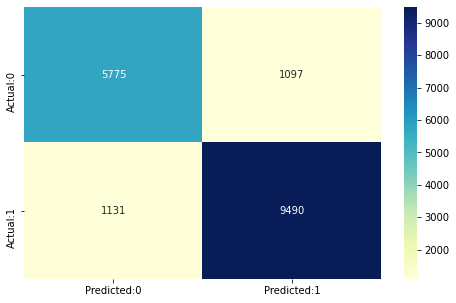

In [ ]:
cm=confusion_matrix(y_test,y_test_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

### Model Statistics

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print(' The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

 The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.8726347681929915 

 The Miss-classification = 1-Accuracy =  0.12736523180700854 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.8935128518971848 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.8403667054714785 

 Positive Predictive value = TP / (TP+FP) =  0.8963823557192784 

 Negative predictive Value = TN / (TN+FN) =  0.8362293657688966 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  5.5972837905537425 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.12671509640909892


### ROC Curve and AUC Score

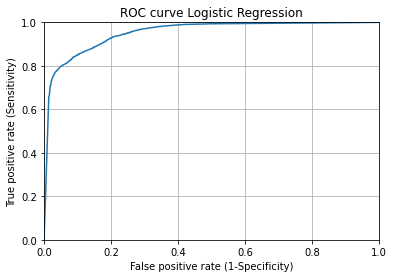

In [ ]:
y_pred_prob_yes=rfc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve Logistic Regression')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.show()

In [ ]:
print('AUC Score: ',roc_auc_score(y_test,y_pred_prob_yes[:,1]))

AUC Score:  0.9524364044632732


# Business Class

In [ ]:
X = air_bus.drop(['Class','dissatisfied'],axis=1)
y = air_bus.dissatisfied
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=20,test_size=0.3)

In [ ]:
rfc = RandomForestClassifier(random_state=20)
rfc.fit(X_train,y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.9750643500643501 

Train accuracy:  1.0 

Precision:  0.9617092119866815 

Recall:  0.9527212754260582 

F1 Score:  0.9571941452637391 

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     13191
         1.0       0.96      0.95      0.96      5457

    accuracy                           0.98     18648
   macro avg       0.97      0.97      0.97     18648
weighted avg       0.98      0.98      0.98     18648
 



In [ ]:
featimp=pd.DataFrame()
featimp['FeatImp']=rfc.feature_importances_
featimp['Features']=X_train.columns
featimp2=featimp.sort_values('FeatImp',ascending=False).reset_index(drop=True)
featimp2

,FeatImp,Features
0,0.196593,Inflight entertainment
1,0.106204,Seat comfort
2,0.085146,Ease of Online booking
3,0.084537,Online support
4,0.059871,Leg room service
5,0.054809,disloyal Customer
6,0.047772,Online boarding
7,0.044099,On-board service
8,0.040505,Checkin service
9,0.039962,Age


In [ ]:
trainaccscores=[]
testaccscores=[]
rocscores=[]
kfoldmeanscore=[]
kfoldvariancescore=[]
for i in range(1,21):
    rfc = RandomForestClassifier(n_estimators=140,max_depth=30,random_state=20)
    rfc.fit(X_train[featimp2[0:i]['Features']],y_train)
    y_test_pred = rfc.predict(X_test[featimp2[0:i]['Features']])
    y_train_pred = rfc.predict(X_train[featimp2[0:i]['Features']])
    trainaccscores.append(accuracy_score(y_train,y_train_pred))
    testaccscores.append(accuracy_score(y_test,y_test_pred))
    y_pred_prob_yes=rfc.predict_proba(X_test[featimp2[0:i]['Features']])
    rocscores.append(roc_auc_score(y_test,y_pred_prob_yes[:,1]))
    X1=pd.concat([X_train[featimp2[0:i]['Features']],X_test[featimp2[0:i]['Features']]],axis=0)
    y1=pd.concat([y_train,y_test],axis=0)
    kf=KFold(n_splits=5,shuffle=True,random_state=0)
    score = cross_val_score(rfc, X1, y1, cv=kf, scoring='f1')
    kfoldmeanscore.append(np.mean(score))
    kfoldvariancescore.append(np.std(score)/np.mean(score))
feature_scores=pd.DataFrame()
feature_scores['Train Accuracy']=trainaccscores
feature_scores['Test Accuracy']=testaccscores
feature_scores['AUC scores']=rocscores
feature_scores['Kfold Mean F1 score']=kfoldmeanscore
feature_scores['Kfold Variance F1 score']=kfoldvariancescore
feature_scores

,Train Accuracy,Test Accuracy,AUC scores,Kfold Mean F1 score,Kfold Variance F1 score
0,0.828967,0.826255,0.849065,0.713704,0.007210
1,0.862406,0.861326,0.908221,0.752710,0.005072
2,0.912001,0.912698,0.960990,0.844477,0.003649
3,0.926434,0.922512,0.966504,0.862033,0.006385
4,0.941556,0.933290,0.975262,0.883062,0.004065
5,0.951737,0.942192,0.980910,0.899819,0.003145
6,0.960976,0.946911,0.982403,0.911542,0.003415
7,0.968377,0.950558,0.984360,0.917523,0.003146
8,0.977776,0.951148,0.983962,0.917968,0.003594
9,0.997035,0.954740,0.988096,0.924912,0.002497


In [ ]:
feature_scores['Number of Features']=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
feature_scores

,Train Accuracy,Test Accuracy,AUC scores,Kfold Mean F1 score,Kfold Variance F1 score,Number of Features
0,0.828967,0.826255,0.849065,0.713704,0.007210,1
1,0.862406,0.861326,0.908221,0.752710,0.005072,2
2,0.912001,0.912698,0.960990,0.844477,0.003649,3
3,0.926434,0.922512,0.966504,0.862033,0.006385,4
4,0.941556,0.933290,0.975262,0.883062,0.004065,5
5,0.951737,0.942192,0.980910,0.899819,0.003145,6
6,0.960976,0.946911,0.982403,0.911542,0.003415,7
7,0.968377,0.950558,0.984360,0.917523,0.003146,8
8,0.977776,0.951148,0.983962,0.917968,0.003594,9
9,0.997035,0.954740,0.988096,0.924912,0.002497,10


In [ ]:
X = air_bus[['Inflight entertainment','Seat comfort','Ease of Online booking','Online support','Leg room service','disloyal Customer']]
y = air_bus.dissatisfied
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=20,test_size=0.3)

In [ ]:
rfc = RandomForestClassifier(random_state=20)
rfc.fit(X_train,y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.9420849420849421 

Train accuracy:  0.9517374517374517 

Precision:  0.9193332055949416 

Recall:  0.8792376763789628 

F1 Score:  0.8988385162982391 

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     13191
         1.0       0.92      0.88      0.90      5457

    accuracy                           0.94     18648
   macro avg       0.94      0.92      0.93     18648
weighted avg       0.94      0.94      0.94     18648
 



In [ ]:
rf = RandomForestClassifier(random_state=20)
params = {'n_estimators':np.arange(100,150,10),'max_depth':[10,20,30],'max_features':[2,4,6,8,10]}
grid = GridSearchCV(estimator=rf,param_grid=params,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'max_depth': 30, 'max_features': 2, 'n_estimators': 110}

In [ ]:
rfc = RandomForestClassifier(random_state=20,n_estimators=110,max_depth=30,max_features=2)
rfc.fit(X_train,y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.9421385671385671 

Train accuracy:  0.9517374517374517 

Precision:  0.9199923254029163 

Recall:  0.8786879237676379 

F1 Score:  0.8988658730902616 

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     13191
         1.0       0.92      0.88      0.90      5457

    accuracy                           0.94     18648
   macro avg       0.94      0.92      0.93     18648
weighted avg       0.94      0.94      0.94     18648
 



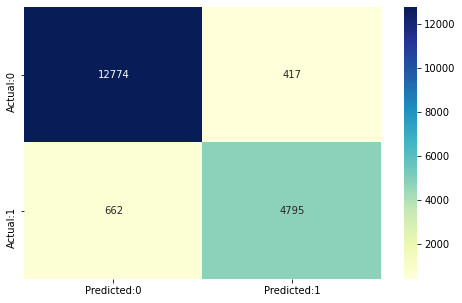

In [ ]:
cm=confusion_matrix(y_test,y_test_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

### Model Statistics

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print(' The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

 The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.9421385671385671 

 The Miss-classification = 1-Accuracy =  0.05786143286143286 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.8786879237676379 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9683875369570162 

 Positive Predictive value = TP / (TP+FP) =  0.9199923254029163 

 Negative predictive Value = TN / (TN+FN) =  0.9507293837451622 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  27.79561727198783 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.12527224029913012


### ROC Curve and AUC Score

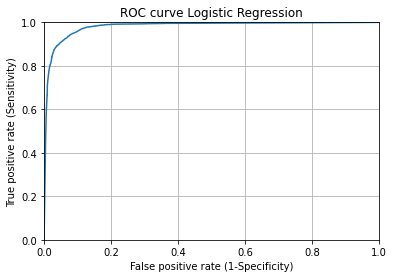

In [ ]:
y_pred_prob_yes=rfc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve Logistic Regression')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.show()

In [ ]:
print('AUC Score: ',roc_auc_score(y_test,y_pred_prob_yes[:,1]))

AUC Score:  0.9808685660603413


# Business Insights

* The factors effecting the customer satisfaction are different for different classes of passengers.
* Most of the airline passengers travel by business class

## Business Class:
1. The most important feature for the business class customers in **Inflight entertainment**, the passengers in business class who rated inflight entertainment high are mostly satisfied with the airline.
2. The other important features of business class are **Seat comfort, Ease of online booking, online support, Legroom service**
3. In the case of disloyal customers the ratings had to be almost perfect in order to be satisfied with the airline

## Eco-plus Class:
1. The top priority of eco-plus passengers in **Inflight Entertainment** similar to the business class passengers.
2. The other important features are **Seat Comfort, Ease of Online Booking, Online support**
3. The customer satisfcation is dependent if the passenger is a male or female. **Male** passengers in the eco-plus class were more **dissatisfied** with the airline.

## Economy Class: 
1. Similar to the other classes **Inflight Entertaiment** is the most important feature for the economy class passengers
2. The other important features are **Seat Comfort, Food and Drink, Ease of Online Booking**
3. Female passengers are more satisfied with the airline than male passengers who are travelling in economy class.
4. Personal traveller using economy class are mostly dissatisfied with the airline.
5. Passengers travelling more distance in economy class are mostly dissatified with the airline. The other classes has better comfort for travel.
6. More delays in the airline causes dissatisfication to ecomony class passengers in comparision to the other classes as the other classes get compensation for delays


## Suggestions: 
1. The improvement of **Inflight Entertainment, Seat Comfort, Ease of Online Booking** is the top priority as these features are important for all the classes.
2. Ease of Online Booking, Online support, Legroom Service are important as these are important for the business class passengers and they form most of the airline's customers.
3. Food and drinks for the economy class has to be improved as it is one of the important features.
4. Damage control has to be done for delayed flights also for the economy class passengers as delayed flight are one of the important cause of dissatisfcation for the economy class passengers.